# **SPRINT 2,3 - EDA and Statistical Analysis 📉📈📊**

# **Main Motive and Problem Statement for the EDA and Statistical Analysis**

### **Aim for the EDA** : Main motive behind the EDA on the following Data is to have an conclusive proof of wether or not "Auralin" can really replace the already existing "Novodra" based on some of the important factors such as investigating treatments and adverse reactions of all the patients that gone through this Clinical trial period.

### **Problem Statement** : "Can Auralin demonstrate non-inferiority to Novodra in terms of treatment efficacy and safety, based on an analysis of clinical trial data, to justify its potential replacement?"

# **Description of the Data we are going to study and table wise EDA and necessary Tests** :





**Description**:
  1. **Overall Summary** : We are trying to analyze the Clinical Trial Dataset, by performing EDA and Statistical Tests on Data we had already peformed Data Wrangling to clean the given Messy and Dirty Data.

  2. **Table-1 -> Patients** : We have the cleaned table of the Patients table which consists of patients details of over 500 in number, the same patients that are going to act as test subjects for this Clinical Trial Period.

  3. **Table-2 -> Treatments** : We have the cleaned table of the Treatments table which consists of Treatments details being performed on 350 of those 500 patients, where 175 test subjects were given 'Aurilin' and the other 175 were remained on the already ongoing 'Novodra'.

  4. **Table-3 -> Reactions** : We have the cleaned table of the Reactions Table which consists of the adverse reactions that had an effect on the trial patirnts during the ongoing trial period.

  5. We have also merged a few tables/data to have a more precise and elaborate analysis.

In [ ]:
# !pip install --upgrade seaborn

In [ ]:
# importing necessary libraries for EDA :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


# importing ncessary libraries for Statistical Analysis :

# Statistical Tests
import scipy.stats as stats

# Miscellaneous
import math
import random

In [ ]:
# sns.set(style="white")

In [ ]:
# importing necessary csv files as DataFrames :
patients = pd.read_csv('/content/patients_clean.csv')
reactions = pd.read_csv('/content/reactions_clean.csv')
treatments = pd.read_csv('/content/treatments_clean.csv')

# importing merged Data :
pat_and_reac = pd.read_csv('/content/patients_merged_with_reactions.csv')
treat_and_reac = pd.read_csv('/content/treatments_merged_with_reactions.csv')
pat_and_treat = pd.read_csv('/content/patients_merged_with_treatments.csv')

**EDA ON TABLE 1 : PATIENTS**

In [ ]:
patients.head()

,patient_id,gender,first_name,last_name,city,state,zip_code,country,birthdate,weight,height,bmi,street_no,street_name,phone_num,email_id,full_name
0,405,Female,Aaliyah,Rice,Texas City,TX,77591.0,United States,1936-07-14,123.0,65,20.5,4237.0,Hamilton Drive,409-944-6516,AaliyahRice@dayrep.com,aaliyah rice
1,12,Male,Abdul-Nur,Isa,Brentwood,TN,37027.0,United States,1954-02-03,238.7,73,31.5,1092.0,Farm Meadow Drive,1 931 207 0839,Abdul-NurMummarIsa@rhyta.com,abdul-nur isa
2,333,Male,Abel,Efrem,Old Hickory,TN,37138.0,United States,1971-02-15,224.0,67,35.1,2333.0,Hidden Pond Road,1 615 755 8235,AbelEfrem@fleckens.hu,abel efrem
3,259,Male,Abel,Yonatan,Burbank,CA,91502.0,United States,1952-04-29,137.9,66,22.3,2621.0,Koontz Lane,1 818 841 7660,AbelYonatan@teleworm.us,abel yonatan
4,306,Female,Addolorata,Lombardi,Binghamton,NY,13901.0,United States,1962-10-19,189.0,65,31.4,550.0,Cliffside Drive,+1 (607) 348-5625,AddolorataLombardi@jourrapide.com,addolorata lombardi


- **Univariate Analysis** :

<ipython-input-779-57abda7bfd6e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=patients, x='gender', palette=['blue', 'red'], ax=axs[0])


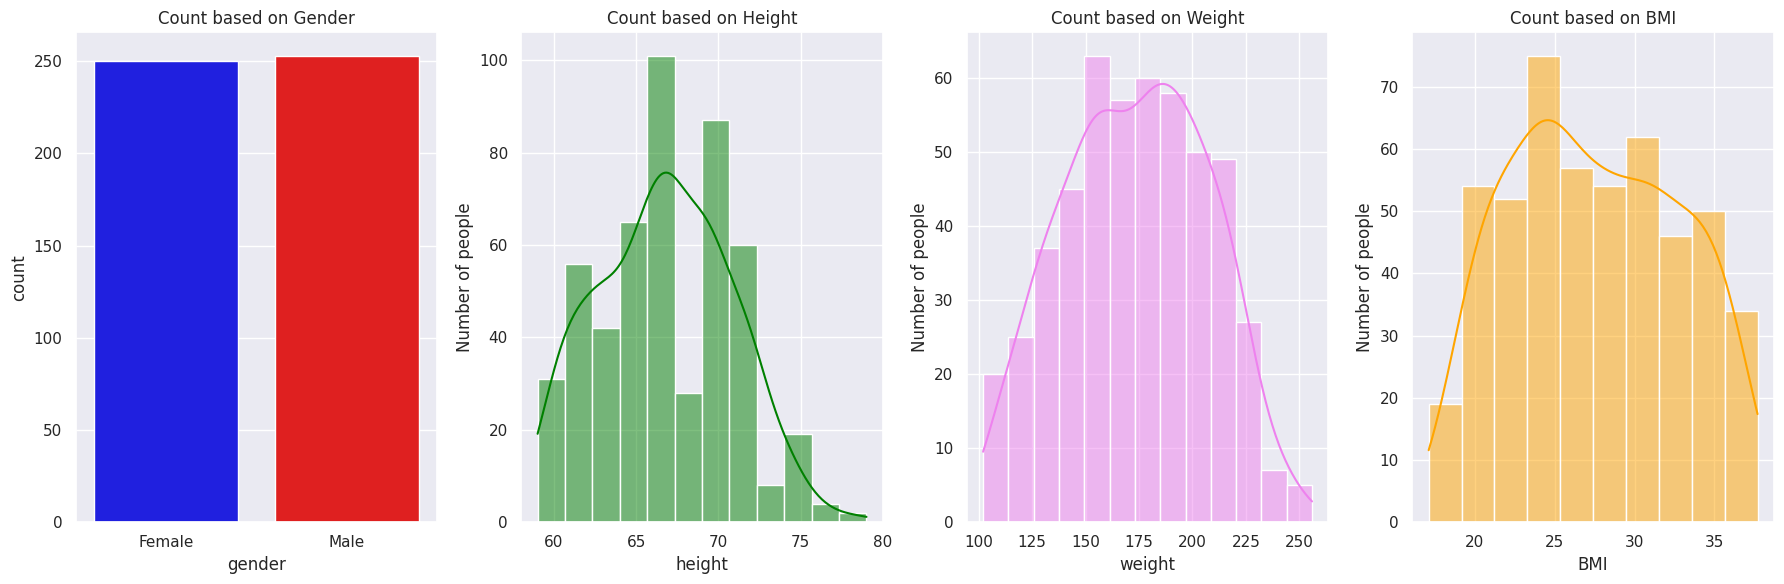

In [ ]:
# plots based on gender, height and weight

fig, axs = plt.subplots(1, 4, figsize=(18, 6))

sns.countplot(data=patients, x='gender', palette=['blue', 'red'], ax=axs[0])
axs[0].set_title("Count based on Gender")

sns.histplot(data=patients, x='height',color = 'green', kde=True, ax=axs[1])
axs[1].set_title("Count based on Height")
axs[1].set_xlabel('height')
axs[1].set_ylabel('Number of people')

sns.histplot(data=patients, x='weight', color = 'violet', kde=True, ax=axs[2])
axs[2].set_title("Count based on Weight")
axs[2].set_xlabel('weight')
axs[2].set_ylabel('Number of people')

sns.histplot(data=patients, x='bmi', color = 'orange', kde=True, ax=axs[3])
axs[3].set_title("Count based on BMI")
axs[3].set_xlabel('BMI')
axs[3].set_ylabel('Number of people')

plt.tight_layout()
plt.show()


- **Based on plots we can say that** :

  1.   Plot 1 about Gender : we can say that there is little to no disparity in subjects.

  2.   Plot 2 about height : we can say that majority of subjects are between 60 and 80 inches and seems to be a bit left skewd With a Skewness Index of -0.102.

  3.   Plot 3 about weight : we can say that majority of subjects are between 150 and 200 pounds and by observing we can see it's a normal distribution(skewness ~= -0.132).

  4.   Plot 4 about BMI : we can say that majority of people are in BMI index of 20 and 30 which is considered pretty healthy according MD norms, need to check for normal distribution(skewness ~= 0.086).


- This analysis is for the pre trial period, still analysis and feature enginnering to be done.

In [ ]:
# Checking for skewness of demographic factors and descriptive statistics of the patients table.

print("Skewness of patients w.r.t height : ",patients['height'].skew())
print()
print("Skewness of patients w.r.t weight : ",patients['weight'].skew())
print()
print("Skewness of patients w.r.t BMI : ",patients['bmi'].skew())
print()
print("Descriptive Statistics of Patients Table : \n", patients.describe())

Skewness of patients w.r.t height :  0.09788077427901426

Skewness of patients w.r.t weight :  -0.028696900139210325

Skewness of patients w.r.t BMI :  0.08695987378203711

Descriptive Statistics of Patients Table : 
        patient_id      zip_code     weight      height         bmi  \
count  503.000000    491.000000  503.00000  503.000000  503.000000   
mean   252.000000  49084.118126  173.55186   66.723658   27.483897   
std    145.347859  30265.807442   33.58609    4.047179    5.276438   
min      1.000000   1002.000000  102.10000   59.000000   17.100000   
25%    126.500000  21920.500000  149.30000   63.000000   23.300000   
50%    252.000000  48057.000000  175.30000   67.000000   27.200000   
75%    377.500000  75679.000000  199.50000   70.000000   31.750000   
max    503.000000  99701.000000  255.90000   79.000000   37.700000   

         street_no  
count   491.000000  
mean   2409.507128  
std    1461.850229  
min      34.000000  
25%    1112.500000  
50%    2370.000000  
75% 

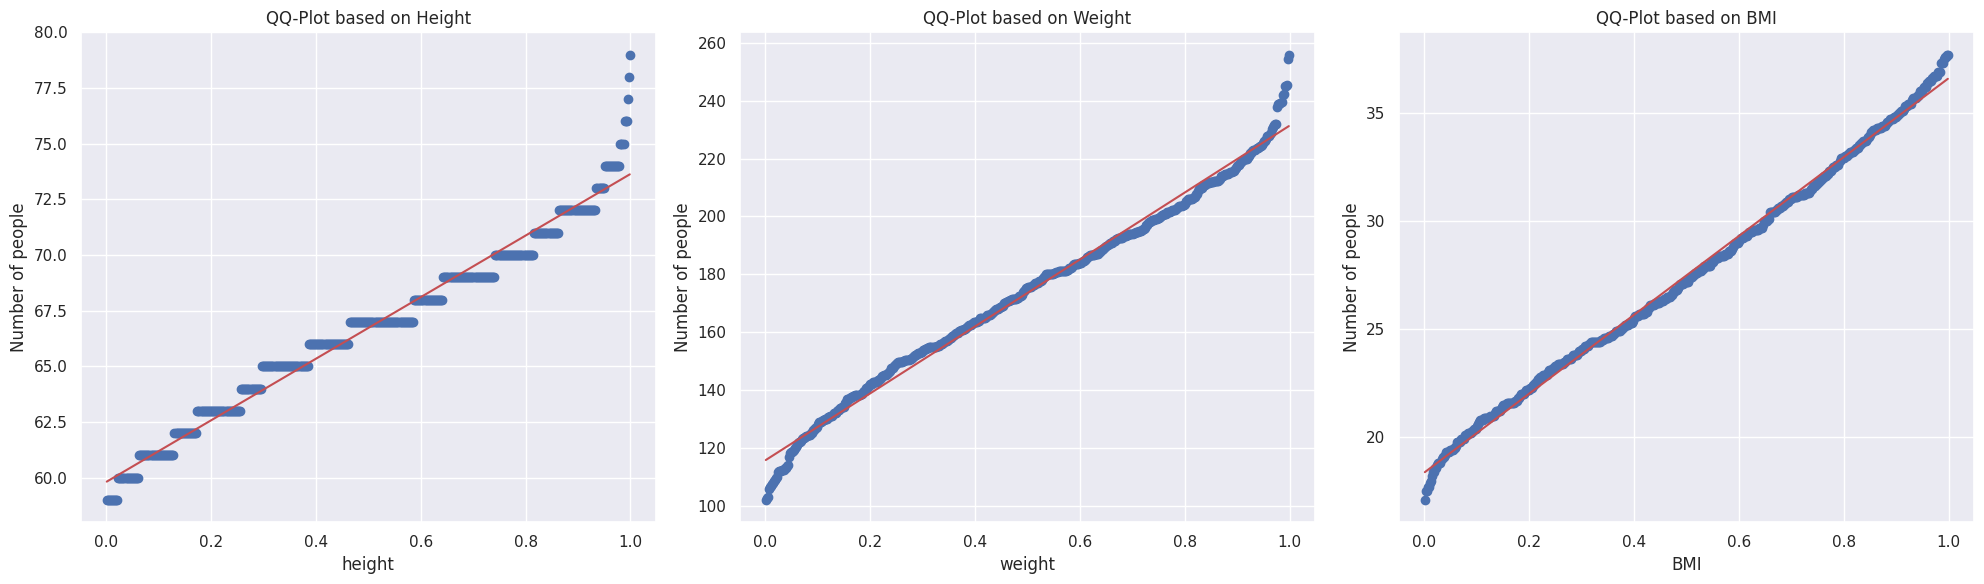

In [ ]:
# Checking to confirm if Height, Weight and Bmi Distributiins are indeed Normal as they appear it to be using QQ - plot.

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

stats.probplot(patients['height'],dist='uniform',plot=axs[0])
axs[0].set_title("QQ-Plot based on Height")
axs[0].set_xlabel('height')
axs[0].set_ylabel('Number of people')

stats.probplot(patients['weight'], dist='uniform',plot=axs[1])
axs[1].set_title("QQ-Plot based on Weight")
axs[1].set_xlabel('weight')
axs[1].set_ylabel('Number of people')

stats.probplot(patients['bmi'],  dist='uniform',plot=axs[2])
axs[2].set_title("QQ-Plot based on BMI")
axs[2].set_xlabel('BMI')
axs[2].set_ylabel('Number of people')

plt.tight_layout()
plt.show()


# stats.probplot(patients['height'], plot=axs)

**Insights based on QQ-plots**  : QQ-plot is done basically to show the normality in distribution through visuals.

  * Plot-1 -> QQ-plot based on Height : By visualizing, we can say that the plot is almost matching the expected p-value plot line, but the slight dispersion/variations can be a result of skewness and it does seem to follow a normal distribution, further tests are required.

  * Plot-2 -> QQ-plot based on Weight : By visulaizing, we can say that the plot is almost matching the expected p-value plot line,  suggesting it's a Uniform Distribution, upon checking.

  
  * Plot-3 -> QQ-plot based on BMI : By visulaizing, we can say that the plot is Deviating from the expected p-value plot line, suggesting it's a Uniform Distribution, upon checking.

  * Further Statistical tests need to be performed such as shapiro whilk test, etc., ti further analyze.


- **BiVariate and MultiVariate Analysis** :


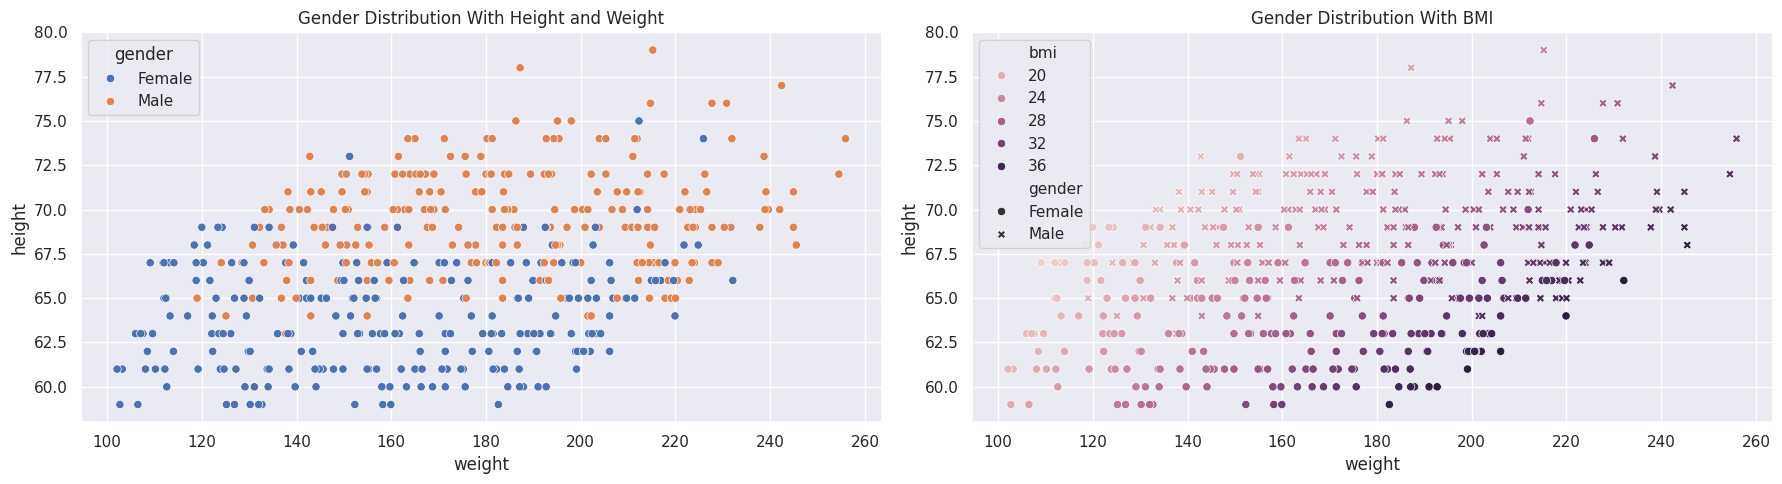

In [ ]:
# plots of gender vs height and weight and gender vs BMI

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot for gender distribution
sns.scatterplot(x='weight',y='height',data=patients,hue='gender', ax=axes[0])
axes[0].set_title('Gender Distribution With Height and Weight')

 # Plot for medication distribution
sns.scatterplot(x='weight',y='height',data=patients,hue='bmi',style='gender',ax=axes[1])
axes[1].set_title('Gender Distribution With BMI')


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

- **Bivariate analysis based on gender with respect to height, weight and bmi** :
    
    1. We can see that male subjects in particular have more height and weight compared to female counterparts.

    2. But when we compare the BMI we can see the female subjects have a very good BMI index that is ranging between 20 and 28 where as in the case of overweight subjects we have female more than male

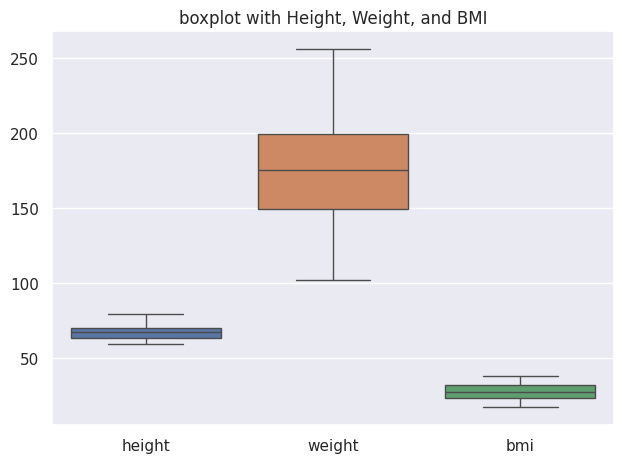

In [ ]:
# Outlier Analysis on the above Distributions

# Boxplots of height, weight and BMI
cols = ['height', 'weight', 'bmi']

# BoxPlot for gender distribution
sns.boxplot(data=patients[cols])
plt.title('boxplot with Height, Weight, and BMI')

plt.tight_layout()
plt.show()

**Insights** :
  1. In height boxplot we have noticed that the patient height is 27 inches, which is too short for his demographics, so it's clearly an outlier , for which we have cleaned and curated in datacleaning process and changed it to 72 inches..

  2. Similarly in weight boxplot, we have noticed that patient weight is 48.8 lbs, for which we have cleaned and curated in datacleaning process and changed it to 107.58 lbs because it was outlier/messy it's clearly an outlier.

  3. These two data points are clear outliers, as the height and weight values do not align with the rest of the dataset.

  4. Therefore, we can remove these rows from the dataset.



In [ ]:
patients.head()

,patient_id,gender,first_name,last_name,city,state,zip_code,country,birthdate,weight,height,bmi,street_no,street_name,phone_num,email_id,full_name
0,405,Female,Aaliyah,Rice,Texas City,TX,77591.0,United States,1936-07-14,123.0,65,20.5,4237.0,Hamilton Drive,409-944-6516,AaliyahRice@dayrep.com,aaliyah rice
1,12,Male,Abdul-Nur,Isa,Brentwood,TN,37027.0,United States,1954-02-03,238.7,73,31.5,1092.0,Farm Meadow Drive,1 931 207 0839,Abdul-NurMummarIsa@rhyta.com,abdul-nur isa
2,333,Male,Abel,Efrem,Old Hickory,TN,37138.0,United States,1971-02-15,224.0,67,35.1,2333.0,Hidden Pond Road,1 615 755 8235,AbelEfrem@fleckens.hu,abel efrem
3,259,Male,Abel,Yonatan,Burbank,CA,91502.0,United States,1952-04-29,137.9,66,22.3,2621.0,Koontz Lane,1 818 841 7660,AbelYonatan@teleworm.us,abel yonatan
4,306,Female,Addolorata,Lombardi,Binghamton,NY,13901.0,United States,1962-10-19,189.0,65,31.4,550.0,Cliffside Drive,+1 (607) 348-5625,AddolorataLombardi@jourrapide.com,addolorata lombardi


####**Skewness significantly reduced, approaching a normal distribution.**
   * Use Shapiro-Wilk test to Know the it is following normal distribution or not

In [ ]:
# Checking for Normality through Statistics After removing Outliers

# Shapiro Wilk Test : performed to check wether distribution is normal or not.
from scipy.stats import shapiro


# Perform Shapiro-Wilk test on Height distribution :
w_stat_height, p_value_height = shapiro(patients['height'])

print("W Statistic of height : ", w_stat_height)
print("p-value_height:", p_value_height)

if p_value_height < 0.05:
    print("Reject null hypothesis: Height does not follow a normal distribution")
else:
    print("Fail to reject null hypothesis: height follows a normal distribution")

print()
# Perform Shapiro-Wilk test on Weight distribution :
w_stat_weight, p_value_weight = shapiro(patients['weight'])

print("W Statistic of weight : ", w_stat_weight)
print("p-value_weight:", p_value_weight)

if p_value_weight < 0.05:
    print("Reject null hypothesis: Weight does not follow a normal distribution")
else:
    print("Fail to reject null hypothesis: Weight follows a normal distribution")

print()
# Perform Shapiro-Wilk test on BMI distribution :
w_stat_bmi, p_value_bmi = shapiro(patients['bmi'])

print("W Statistic of bmi : ", w_stat_bmi)
print("p-value_bmi:", p_value_bmi)

if p_value_bmi < 0.05:
    print("Reject null hypothesis: BMI does not follow a normal distribution")
else:
    print("Fail to reject null hypothesis: BMI follows a normal distribution")

W Statistic of height :  0.9812764216002094
p-value_height: 4.5408942196116775e-06
Reject null hypothesis: Height does not follow a normal distribution

W Statistic of weight :  0.9862628508212261
p-value_weight: 0.00011066720557970203
Reject null hypothesis: Weight does not follow a normal distribution

W Statistic of bmi :  0.9686777945467911
p-value_bmi: 6.927579107393802e-09
Reject null hypothesis: BMI does not follow a normal distribution


**Insights Based on Shapiro Wilk Test** :
* To perform this test, we are claiming the
  * Null Hypothesis(Ho) to be "Distribution follows Normality".
  * ALternate Hypothesis(Ha) to be "Distribution does not follow Normality".
* if P-Value comes out to be greater than 0.05 then, data follows Normal Distribution.
* But we can see that neither of the factors(Height, Weight, BMI) follow Normal Distributions.

In [ ]:
# Removing Outliers
patients = patients[(patients['height'] >= 50) & (patients['weight'] >= 50)]

patients.head()

,patient_id,gender,first_name,last_name,city,state,zip_code,country,birthdate,weight,height,bmi,street_no,street_name,phone_num,email_id,full_name
0,405,Female,Aaliyah,Rice,Texas City,TX,77591.0,United States,1936-07-14,123.0,65,20.5,4237.0,Hamilton Drive,409-944-6516,AaliyahRice@dayrep.com,aaliyah rice
1,12,Male,Abdul-Nur,Isa,Brentwood,TN,37027.0,United States,1954-02-03,238.7,73,31.5,1092.0,Farm Meadow Drive,1 931 207 0839,Abdul-NurMummarIsa@rhyta.com,abdul-nur isa
2,333,Male,Abel,Efrem,Old Hickory,TN,37138.0,United States,1971-02-15,224.0,67,35.1,2333.0,Hidden Pond Road,1 615 755 8235,AbelEfrem@fleckens.hu,abel efrem
3,259,Male,Abel,Yonatan,Burbank,CA,91502.0,United States,1952-04-29,137.9,66,22.3,2621.0,Koontz Lane,1 818 841 7660,AbelYonatan@teleworm.us,abel yonatan
4,306,Female,Addolorata,Lombardi,Binghamton,NY,13901.0,United States,1962-10-19,189.0,65,31.4,550.0,Cliffside Drive,+1 (607) 348-5625,AddolorataLombardi@jourrapide.com,addolorata lombardi


**EDA ON TABLE 2 : TREATMENTS**

In [ ]:
treatments['medicine_label'] = '*'
treatments['medicine_label'] = np.where(treatments['auralin'] != '-', 'A', 'N')

In [ ]:
treatments.head()

,first_name,last_name,auralin,novodra,hba1c_start,hba1c_end,hba1c_change,full_name,medicine_label
0,Aaliyah,Rice,-,31u - 31u,7.64,7.33,0.31,aaliyah rice,N
1,Abdul-Nur,Isa,-,54u - 50u,7.98,7.53,0.45,abdul-nur isa,N
2,Abel,Yonatan,-,38u - 39u,7.88,7.50,0.38,abel yonatan,N
3,Addolorata,Lombardi,-,49u - 46u,7.75,7.33,0.42,addolorata lombardi,N
4,Adib,Ghanem,-,46u - 49u,7.59,7.12,0.47,adib ghanem,N


- **Univariate Analysis** :

<ipython-input-789-4b3ee529a031>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=treatments, x='medicine_label', palette=['green', 'blue'], ax=axs[0])


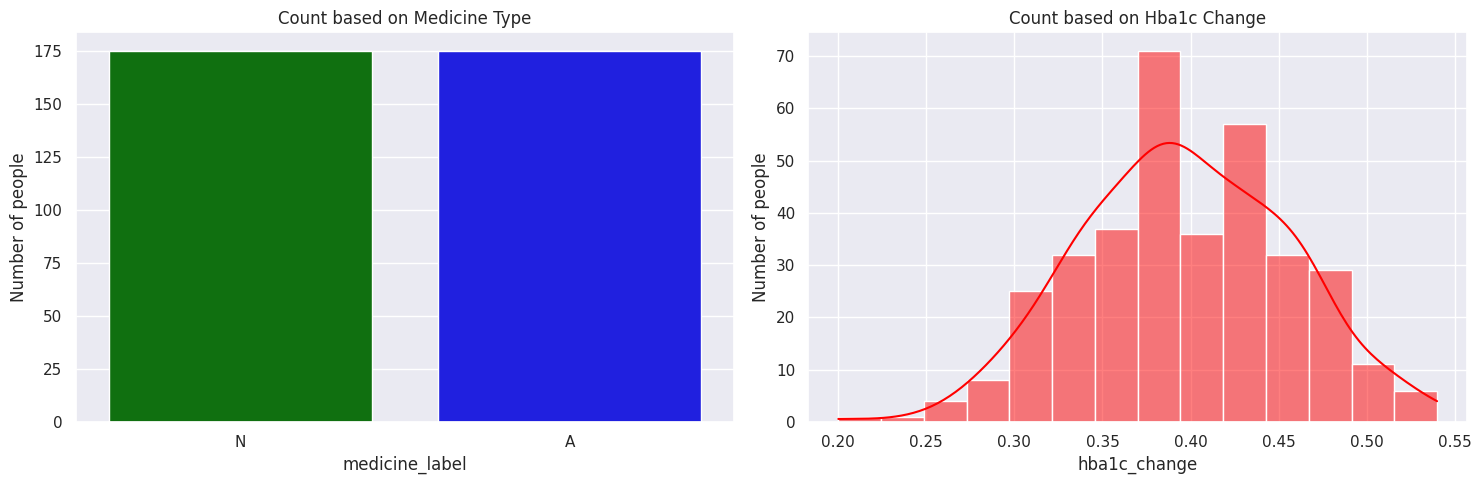

In [ ]:
# plots based on medicine type, hba1c change

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=treatments, x='medicine_label', palette=['green', 'blue'], ax=axs[0])
axs[0].set_title("Count based on Medicine Type")
axs[0].set_ylabel('Number of people')

sns.histplot(data=treatments, x='hba1c_change',color = 'red', kde=True, ax=axs[1])
axs[1].set_title("Count based on Hba1c Change")
axs[1].set_xlabel('hba1c_change')
axs[1].set_ylabel('Number of people')

plt.tight_layout()
plt.show()

**Insights :**
  1.   Plot 1 about Medicine Type : we can say that equal number of people were given the two types of medicine for better results and judgements.

  2.   Plot 2 about Hba1c Change : HbA1c change typically refers to the change in Hemoglobin A1c (HbA1c) levels over time and we can clearlys see that this change follows a normal distribution and leaves us room for further statistical tests.


- This analysis is for the through trial period, still analysis and feature enginnering to be done.

In [ ]:
# Checking for skewness of hba1c change and descriptive statistics of the patients table.

print("Skewness of Hba1c Change : ",treatments['hba1c_change'].skew())
print()
print("Descriptive Statistics of Patients Table : \n", treatments.describe())

Skewness of Hba1c Change :  -0.03931616416440481

Descriptive Statistics of Patients Table : 
        hba1c_start   hba1c_end  hba1c_change
count   350.000000  350.000000    350.000000
mean      7.956343    7.560057      0.396286
std       0.545328    0.545456      0.059283
min       7.500000    7.010000      0.200000
25%       7.650000    7.270000      0.350000
50%       7.785000    7.400000      0.390000
75%       7.950000    7.557500      0.440000
max       9.950000    9.580000      0.540000


In [ ]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   first_name      350 non-null    object 
 1   last_name       350 non-null    object 
 2   auralin         350 non-null    object 
 3   novodra         350 non-null    object 
 4   hba1c_start     350 non-null    float64
 5   hba1c_end       350 non-null    float64
 6   hba1c_change    350 non-null    float64
 7   full_name       350 non-null    object 
 8   medicine_label  350 non-null    object 
dtypes: float64(3), object(6)
memory usage: 24.7+ KB


Statistic of hba1c_change :  0.9942894232834817
p-value_height: 0.2154353986378898
Fail to reject null hypothesis: hba1c_change  follows a normal distribution



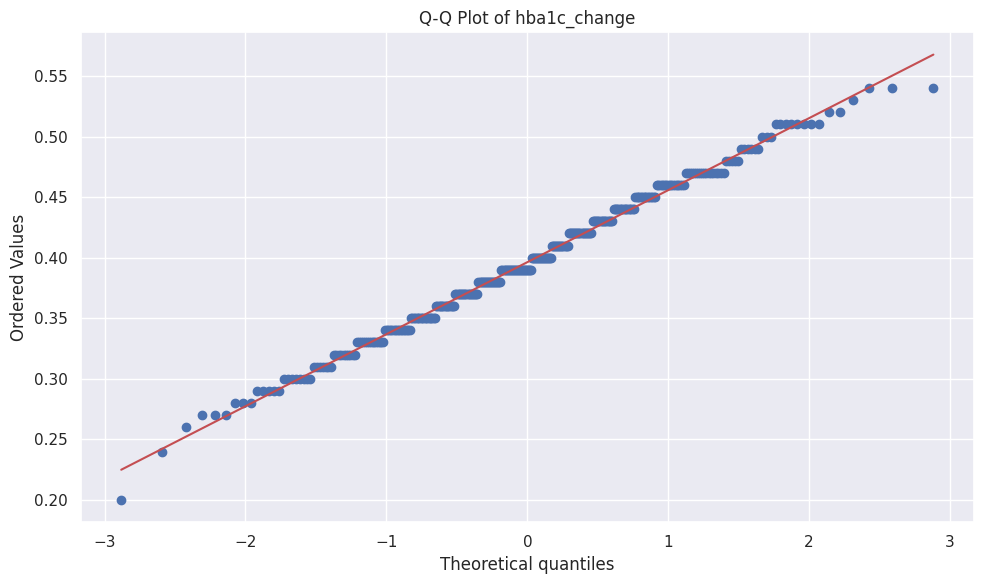

In [ ]:
# Checking to confirm if Hba1c Distributiins are indeed Normal as they appear it to be using Shapiro-Wilk Test and QQ-plot.

# Checking for Normality through Statistics

# Shapiro Wilk Test : performed to check wether distribution is normal or not.
from scipy.stats import shapiro


# Perform Shapiro-Wilk test on hba1c_change distribution :
hba1c_change, p_value_hba1c_change = shapiro(treatments['hba1c_change'])

print("Statistic of hba1c_change : ", hba1c_change)
print("p-value_height:", p_value_hba1c_change)

if p_value_hba1c_change < 0.05:
    print("Reject null hypothesis: hba1c_change  does not follow a normal distribution")
else:
    print("Fail to reject null hypothesis: hba1c_change  follows a normal distribution")

print()

plt.figure(figsize=(10, 6))
stats.probplot(treatments['hba1c_change'], dist="norm", plot=plt)
plt.title("Q-Q Plot of hba1c_change")

plt.tight_layout()
plt.show()

**Insight** :
* p-value of Hba1c Change distribution seems to be greater than 0.5 (p-value > 0.5), which suggests that it follows a 'Normal Distribution".

* This plot lacks skewness and outliers, suggesting no further transformations are necessary

In [ ]:
reactions.head()

,first_name,last_name,adverse_reaction,full_name
0,Abdul-Nur,Isa,Hypoglycemia,abdul-nur isa
1,Abel,Yonatan,Cough,abel yonatan
2,Albinca,Komavec,Hypoglycemia,albinca komavec
3,Alex,Crawford,Hypoglycemia,alex crawford
4,Anenechi,Chidi,Hypoglycemia,anenechi chidi


**EDA ON TABLE 3 : REACTIONS**

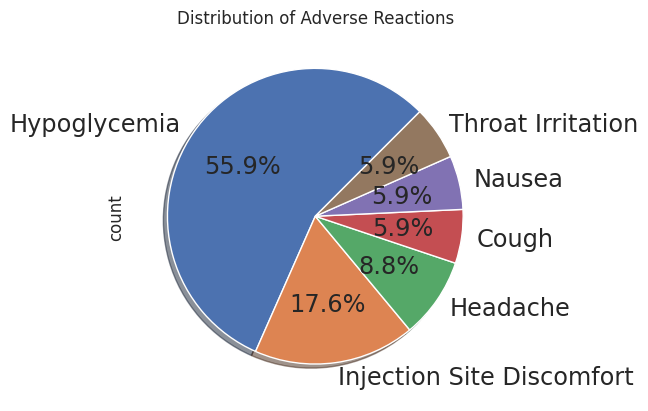

In [ ]:
reactions['adverse_reaction'].value_counts().plot(kind='pie', title='Distribution of Adverse Reactions',autopct='%1.1f%%',shadow=True,startangle=45,textprops={'size': 'x-large'})
plt.show()

**Insights based on pie chart** :

*   Dominant Adverse Reaction is Hypoglycemia, which is a major contributor in low sugar levels so this might be useful factor in future to explore further.
*   Cluster of minor reactions suggest the they are less severe.
*  shows realtively even distrubution, no outliers.
* need to further explore the severity of reactions, and treatments and potential delays.


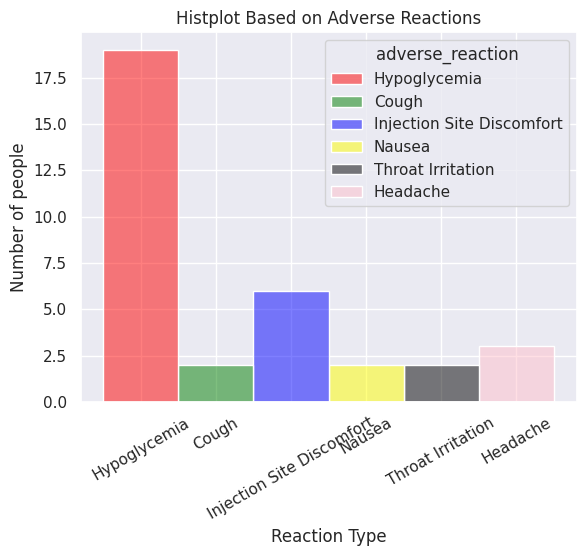

In [ ]:
sns.histplot(data=reactions, x='adverse_reaction', hue='adverse_reaction', palette=['red', 'green', 'blue', 'yellow', 'black', 'pink'], binwidth=1)
plt.title('Histplot Based on Adverse Reactions')
plt.xlabel('Reaction Type')
plt.ylabel('Number of people')

plt.xticks(rotation=30)
plt.show()

**Insights :**
- Based on the above analysis of the adverse reactions table we can say that the highest count of people had "Hypoglycemia : Hypoglycemia, also known as low blood sugar, occurs when blood glucose levels fall below 70 mg/dL." as their adevrse reaction that can be a mjor contibutor in hba1c Change, followed by injection site discomfort.

- further analysis anf feature engineering can be done by merging tables for better results and conclusions.


**EDA ON TABLE 4 : PATIENTS_MERGED_WITH_REACTIONS**

- **Univariate Analysis** :

In [ ]:
pat_and_reac = pat_and_reac.rename(columns={'first_name_x':'first_name', 'last_name_x':'last_name'})
pat_and_reac = pat_and_reac.drop(['first_name_y', 'last_name_y'], axis=1)
pat_and_reac.head()

,first_name,last_name,adverse_reaction,full_name,patient_id,gender,city,state,zip_code,country,birthdate,weight,height,bmi,street_no,street_name,phone_num,email_id
0,Abdul-Nur,Isa,Hypoglycemia,abdul-nur isa,12,Male,Brentwood,TN,37027.0,United States,1954-02-03,238.7,73,31.5,1092.0,Farm Meadow Drive,1 931 207 0839,Abdul-NurMummarIsa@rhyta.com
1,Abel,Yonatan,Cough,abel yonatan,259,Male,Burbank,CA,91502.0,United States,1952-04-29,137.9,66,22.3,2621.0,Koontz Lane,1 818 841 7660,AbelYonatan@teleworm.us
2,Albinca,Komavec,Hypoglycemia,albinca komavec,38,Female,Huron,SD,57350.0,United States,1986-06-05,189.9,66,30.6,1257.0,Elsie Drive,+1 (605) 204-6572,AlbincaKomavec@rhyta.com
3,Alex,Crawford,Hypoglycemia,alex crawford,277,Male,Hope,ID,83836.0,United States,1924-07-07,223.1,70,32.0,373.0,Fantages Way,+1 (208) 264-9063,AlexCrawford@dayrep.com
4,Anenechi,Chidi,Hypoglycemia,anenechi chidi,14,Female,Birmingham,AL,35203.0,United States,1961-03-07,228.4,67,35.8,826.0,Broad Street,+1 (205) 417-8095,AnenechiChidi@armyspy.com


<ipython-input-797-17c7f6b12c82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pat_and_reac, x='gender', palette=['green', 'blue'],ax=axs[0])


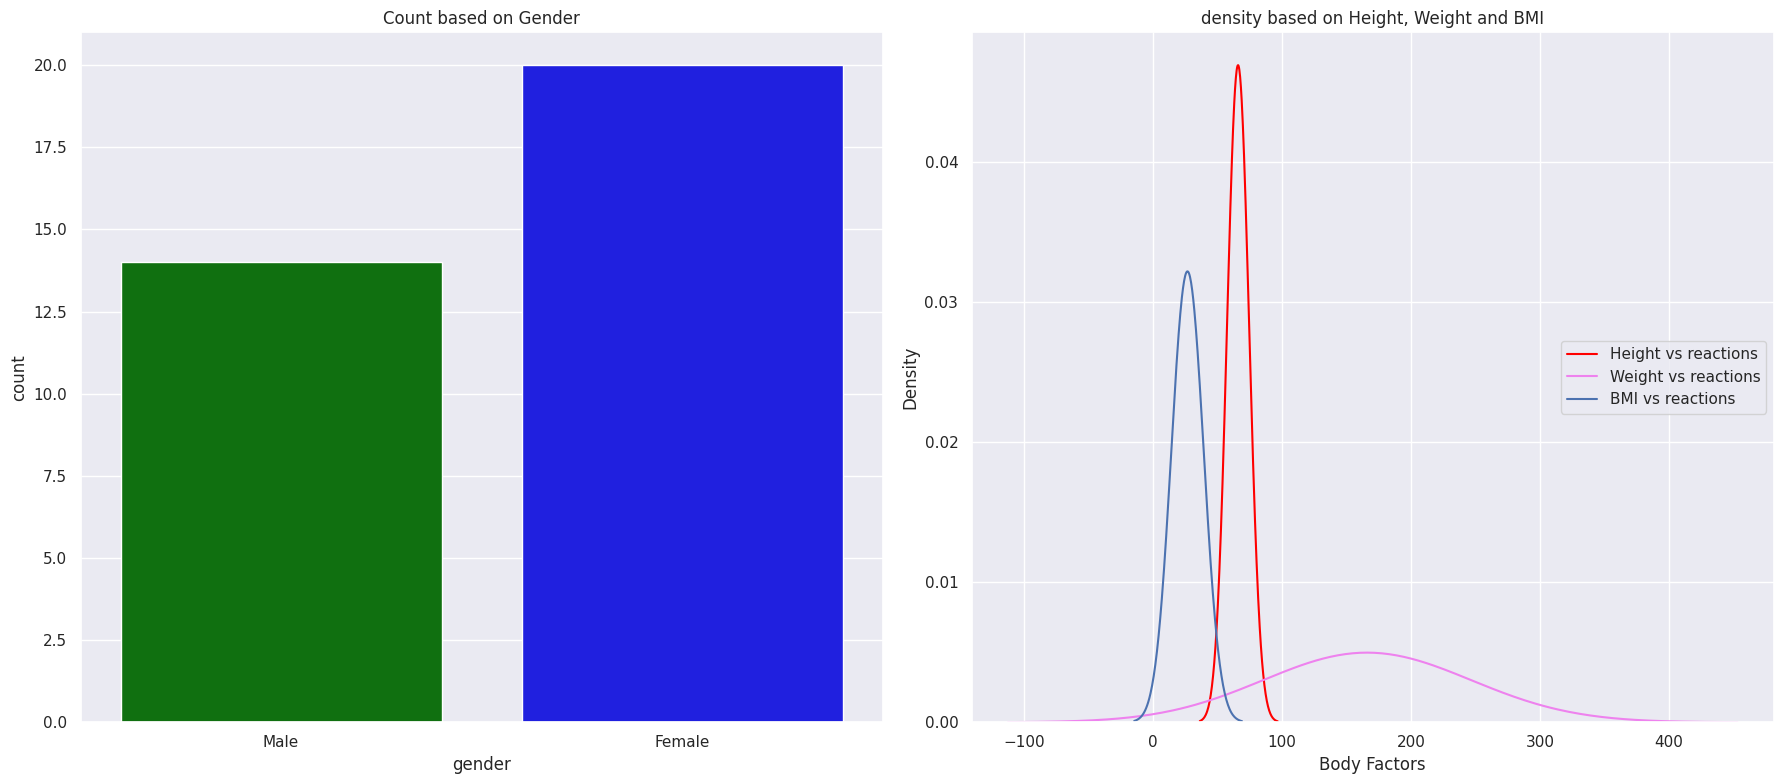

In [ ]:
# univariate plots based on Patients with respect to their adverse reactions

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=pat_and_reac, x='gender', palette=['green', 'blue'],ax=axs[0])
axs[0].set_title("Count based on Gender")

sns.kdeplot(data=pat_and_reac, x='height', ax=axs[1], color='red',label='Height vs reactions',bw_adjust=4)
sns.kdeplot(data=pat_and_reac, x='weight', ax=axs[1], color='violet',label='Weight vs reactions',bw_adjust=4)
sns.kdeplot(data=pat_and_reac, x='bmi', ax=axs[1],label='BMI vs reactions',bw_adjust=4)
axs[1].set_title("density based on Height, Weight and BMI")
axs[1].set_xlabel('Body Factors')
# axs[1].set_ylabel('Number of people')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

**Based on the above analysis** :

1.   The female subjects are more prone to adverse reactions compared to their male counterparts
2.   The plot of height, weight and bmi vs adverse reactions shows us that, they pretty much follow a normal distributions
3.   Still room for further statistical tests and feature engineering.



- **BiVariate and MultiVariate Analysis** :

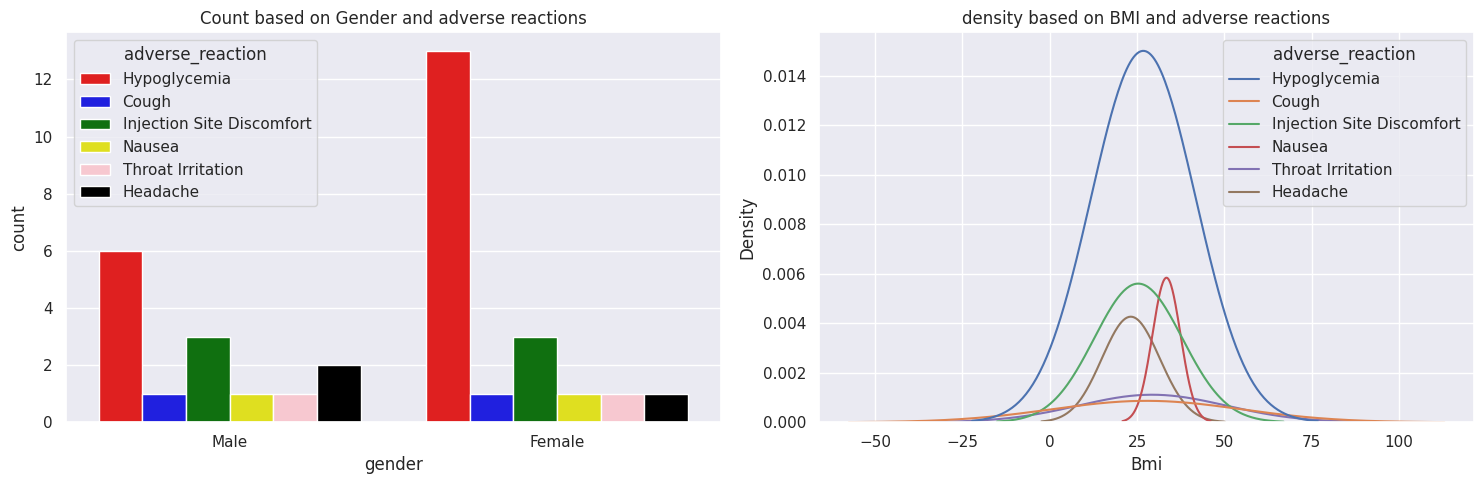

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=pat_and_reac, x='gender', hue = 'adverse_reaction', palette=['red', 'blue', 'green', 'yellow', 'pink', 'black'], ax=axs[0])
axs[0].set_title("Count based on Gender and adverse reactions")

sns.kdeplot(data=pat_and_reac, x='bmi', hue = 'adverse_reaction', ax=axs[1], bw_adjust=4)
axs[1].set_title("density based on BMI and adverse reactions")
axs[1].set_xlabel('Bmi')

plt.tight_layout()
plt.show()

**Based on above analysis here are the following insights** :


1.  Plot-1 -> Gender vs Reactions
    * Hyploglycemia is common across both the genders, which indicates they may have higher risk of low blood sugar level.
    * nausea and headaches are more common in females which may affect their treatments, further investigation is required.
    * Injection site discomfort is relatievly common for both.
2.  Plot-2 -> BMI vs Reactions
    * This plots shows that their is a correlation between BMI and adverse reactions.
    * This plots also shows that some individuals also show multiple symptoms
    * This plots also is helpful in indicating the frequencies of some reactions.
3.  Further investigation is needed.



In [ ]:
pat_and_treat['medicine_label'] = '*'
pat_and_treat['medicine_label'] = np.where(pat_and_treat['auralin'] != '-', 'A', 'N')

Dropping Duplicate Values based on Full names of patients/subjects.

In [ ]:
pat_and_treat = pat_and_treat[pat_and_treat['novodra'].notna()]
pat_and_treat['full_name'] = pat_and_treat['first_name_x'] + ' '+pat_and_treat['last_name_x']
pat_and_treat = pat_and_treat.drop_duplicates(subset='full_name')
# pat_and_treat

**EDA ON TABLE 5 : PATIENTS_MERGED_WITH_TREATMENTS**

In [ ]:
pat_and_treat = pat_and_treat.rename(columns={'first_name_x':'first_name', 'last_name_x':'last_name'})
# pat_and_reac = pat_and_reac.drop(['first_name_y', 'last_name_y'], axis=1)
pat_and_treat.head()

,patient_id,gender,first_name,last_name,city,state,zip_code,country,birthdate,weight,...,email_id,full_name,first_name_y,last_name_y,auralin,novodra,hba1c_start,hba1c_end,hba1c_change,medicine_label
0,405,Female,Aaliyah,Rice,Texas City,TX,77591.0,United States,1936-07-14,123.0,...,AaliyahRice@dayrep.com,Aaliyah Rice,Aaliyah,Rice,-,31u - 31u,7.64,7.33,0.31,N
1,12,Male,Abdul-Nur,Isa,Brentwood,TN,37027.0,United States,1954-02-03,238.7,...,Abdul-NurMummarIsa@rhyta.com,Abdul-Nur Isa,Abdul-Nur,Isa,-,54u - 50u,7.98,7.53,0.45,N
2,259,Male,Abel,Yonatan,Burbank,CA,91502.0,United States,1952-04-29,137.9,...,AbelYonatan@teleworm.us,Abel Yonatan,Abel,Yonatan,-,38u - 39u,7.88,7.50,0.38,N
3,306,Female,Addolorata,Lombardi,Binghamton,NY,13901.0,United States,1962-10-19,189.0,...,AddolorataLombardi@jourrapide.com,Addolorata Lombardi,Addolorata,Lombardi,-,49u - 46u,7.75,7.33,0.42,N
4,119,Male,Adib,Ghanem,Delcambre,LA,70528.0,United States,1967-12-31,254.5,...,AdibMutazzGhanem@fleckens.hu,Adib Ghanem,Adib,Ghanem,-,46u - 49u,7.59,7.12,0.47,N


In [ ]:
pat_and_treat['medicine_name'] = pat_and_treat['medicine_label'].apply(lambda x : 'Novodra' if x=='N' else 'Auralin')

- **Univariate Analysis** :

<ipython-input-803-5ed5efc8f0d8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pat_and_treat, x='medicine_name', palette=['orange', 'blue'],ax=axs[0])


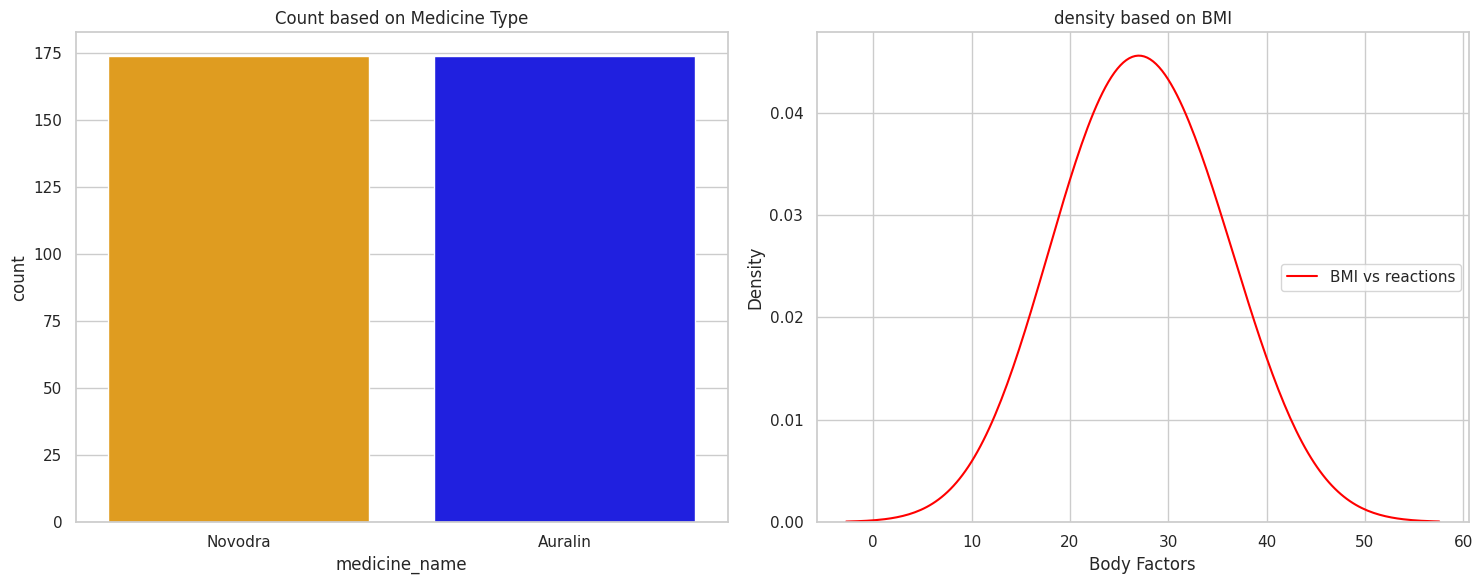

In [ ]:
# univariate plots based on Patients with respect to their Treatments
sns.set_style("whitegrid")
fig, axs = plt.subplots(1,2, figsize=(15, 6))

sns.countplot(data=pat_and_treat, x='medicine_name', palette=['orange', 'blue'],ax=axs[0])
axs[0].set_title("Count based on Medicine Type")

# sns.kdeplot(data=pat_and_treat, x='height', ax=axs[1], color='red',label='Height vs reactions',bw_adjust=4)
# sns.kdeplot(data=pat_and_treat, x='weight', ax=axs[1], color='violet',label='Weight vs reactions',bw_adjust=4)
sns.kdeplot(data=pat_and_treat, x='bmi', ax=axs[1],label='BMI vs reactions',color='red',bw_adjust=4)
axs[1].set_title("density based on BMI")
axs[1].set_xlabel('Body Factors')
# axs[1].set_ylabel('Number of people')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

**Based on above analysis here are the following insights** :


1.  Plot-1 -> Gender vs Reactions
    * The plot shows clear diffrence between two medcine types i.e, Subjects with Aurlin is much higher than Novodra in the case of a pre trial scenario
    * We need to explore how the quantity affects the quality and also compare the two medicines once the trial period starts
    * Based on y-axis we can also tell that there is limited sample size in this trial, which might affect the statistical significance.
2.  Plot-2 -> BMI vs Reactions
    * This plots shows that their is a correlation between height, weight, BMI and adverse reactions.
    * This plots also shows that some individuals also show multiple symptoms
    * This plots also is helpful in indicating the frequencies of some reactions.
3.  Further investigation is needed.

- **BiVariate and MultiVariate Analysis** :

<ipython-input-804-1723b3194d5e>:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=pat_and_treat, x='gender', hue = 'medicine_name', palette=['red', 'blue', 'green', 'yellow', 'pink', 'black'], ax=axs[0])


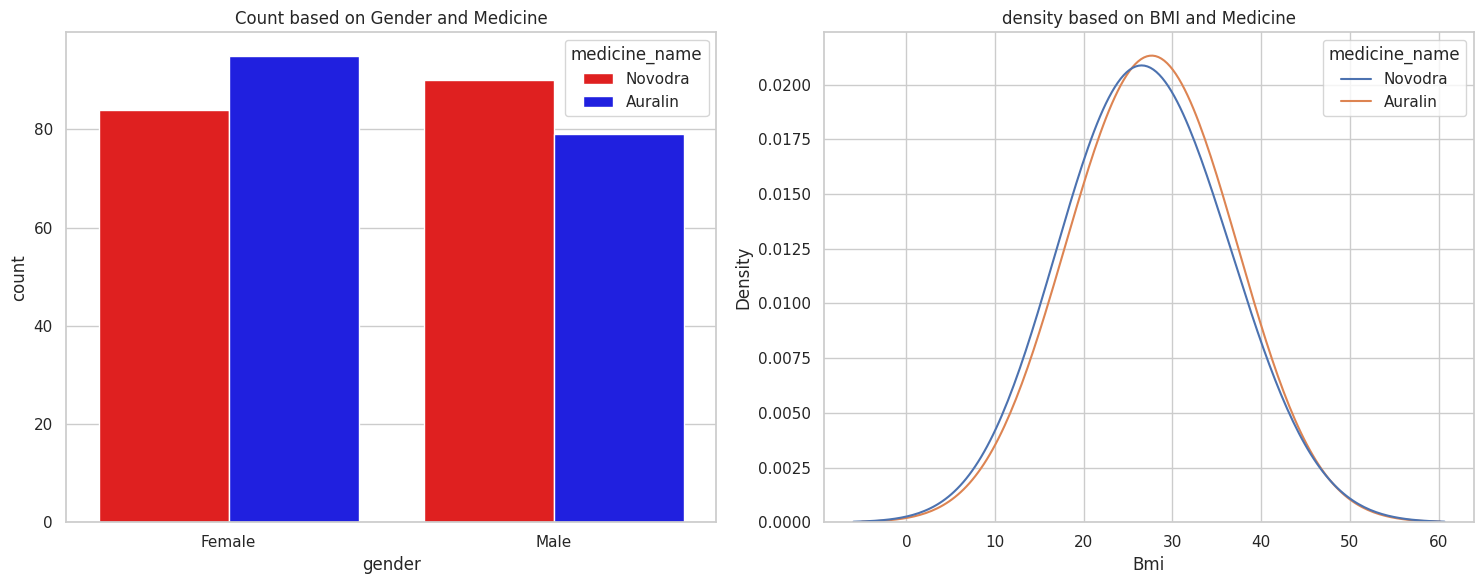

In [ ]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=pat_and_treat, x='gender', hue = 'medicine_name', palette=['red', 'blue', 'green', 'yellow', 'pink', 'black'], ax=axs[0])
axs[0].set_title("Count based on Gender and Medicine")

sns.kdeplot(data=pat_and_treat, x='bmi', hue = 'medicine_name', ax=axs[1], bw_adjust=4)
axs[1].set_title("density based on BMI and Medicine")
axs[1].set_xlabel('Bmi')
# axs[0,1].set_ylabel('Number of people')

plt.tight_layout()
plt.show()

**Insights Based on Patients and Treatments** :

*   *note : N -> Novodra, A -> Auralin
1.  Plot-1 -> Based on Gender and Medicine Type :

    * Shows relatively equal distribution of genders w.r.t medicine types.
    * count of Novodra overall is higher
    * further need to consider equal counts for both medicine types so as to get a proper conclusions.

2.  Plot-2-> Based on BMI w.r.t Medicine Type :

    * Distributions show roughly bell-Shaped curves, indicating a normal distribution.
    * In the BMI vs Medicine plot, Novodra cureve seems a little bit to right, indicating higher that average BMI compared to Aurilin.
3.  Further correaltion analysis, and Statistical tests are required.






In [ ]:
pat_and_treat['medicine_label'] = pat_and_treat['medicine_label']

<ipython-input-806-05b50a096d51>:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.kdeplot(data=pat_and_treat, x='bmi',hue=pat_and_treat[['gender', 'medicine_name']].apply(tuple, axis=1),palette=palette, bw_adjust=4)


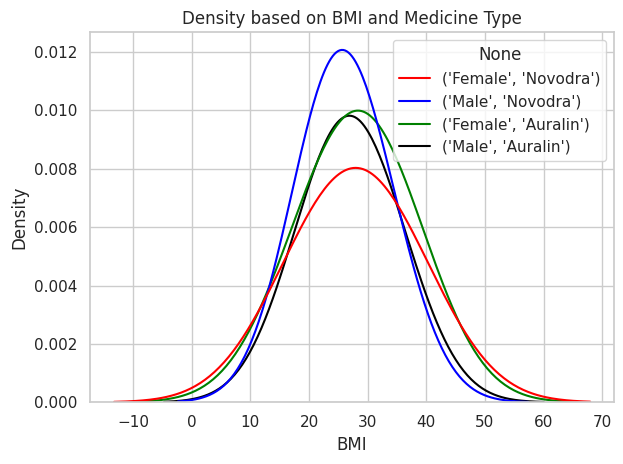

In [ ]:
sns.set_style("whitegrid")

palette = ['red', 'blue', 'green', 'black', 'pink']

sns.kdeplot(data=pat_and_treat, x='bmi',hue=pat_and_treat[['gender', 'medicine_name']].apply(tuple, axis=1),palette=palette, bw_adjust=4)
plt.title("Density based on BMI and Medicine Type")
plt.xlabel('BMI')
# axs[2].set_ylabel('Number of People')


plt.tight_layout()
plt.show()
# plt.grid(False)

**Insights from the above analysis** :

1.  Plot -> BMI Vs Medicine Type :

    * The BMI distribution appears to be roughly normal, suggesting that majority of individuals in dataset have bmi clustered around the mean.
    * The kde plots for different combinations of gender and medicine type show some variations in bmi distributions.

2. Further Statistical tests are required to reach better results and conclusions.







In [ ]:
# pat_and_treat
pat_and_treat = pat_and_treat.drop(['medicine_label'], axis=1)

# **Merging The Necessary Datasets to perform EDA and Statistical analysis for Auralin and Novodra**

1. **Distribution of Adverse Reactions** :
Plot frequency distributions of adverse reactions for Auralin and Novodra.
Compare shapes, central tendencies, and variability.
Identify most common reactions.

2. **Patient Demographics and Reaction Rates** :
Analyze relationships between patient demographics (age, sex, weight) and reaction rates.
Visualize reaction rates by demographic groups.
Identify potential vulnerability factors.

3. **Treatment Dosage and Reaction Severity** :
Examine relationships between treatment dosage and reaction severity.
Plot dosage vs. reaction severity scatter plots.
Identify potential dosage thresholds.

4. **Time-to-Event Analysis** :
Model time-to-event (adverse reaction) distributions.
Compare survival curves for Auralin and Novodra.
Identify potential differences in reaction timing.

5. **Correlation and Clustering Analysis** :
Compute correlation matrices for reaction types and patient characteristics.
Perform clustering analysis to identify reaction patterns.
Identify potential clusters of related reactions.


In [ ]:
final = pat_and_treat
final.head()

,patient_id,gender,first_name,last_name,city,state,zip_code,country,birthdate,weight,...,email_id,full_name,first_name_y,last_name_y,auralin,novodra,hba1c_start,hba1c_end,hba1c_change,medicine_name
0,405,Female,Aaliyah,Rice,Texas City,TX,77591.0,United States,1936-07-14,123.0,...,AaliyahRice@dayrep.com,Aaliyah Rice,Aaliyah,Rice,-,31u - 31u,7.64,7.33,0.31,Novodra
1,12,Male,Abdul-Nur,Isa,Brentwood,TN,37027.0,United States,1954-02-03,238.7,...,Abdul-NurMummarIsa@rhyta.com,Abdul-Nur Isa,Abdul-Nur,Isa,-,54u - 50u,7.98,7.53,0.45,Novodra
2,259,Male,Abel,Yonatan,Burbank,CA,91502.0,United States,1952-04-29,137.9,...,AbelYonatan@teleworm.us,Abel Yonatan,Abel,Yonatan,-,38u - 39u,7.88,7.50,0.38,Novodra
3,306,Female,Addolorata,Lombardi,Binghamton,NY,13901.0,United States,1962-10-19,189.0,...,AddolorataLombardi@jourrapide.com,Addolorata Lombardi,Addolorata,Lombardi,-,49u - 46u,7.75,7.33,0.42,Novodra
4,119,Male,Adib,Ghanem,Delcambre,LA,70528.0,United States,1967-12-31,254.5,...,AdibMutazzGhanem@fleckens.hu,Adib Ghanem,Adib,Ghanem,-,46u - 49u,7.59,7.12,0.47,Novodra


In [ ]:
# Renaming columns in final table
final = final.rename(columns={'treatments.auralin':'auralin', 'treatments.novodra':'novodra', 'treatments.hba1c_start':'hba1c_start', 'treatments.hba1c_end':'hba1c_end', 'treatments.hba1c_change':'hba1c_change'})

In [ ]:
final['trial_dosage'] = '-'
final['trial_dosage'] = final.apply(lambda row: row['novodra'] if row['auralin'] == '-' else row['auralin'], axis=1)

final = final.drop(['auralin', 'novodra'], axis=1)

In [ ]:
final.head()

,patient_id,gender,first_name,last_name,city,state,zip_code,country,birthdate,weight,...,phone_num,email_id,full_name,first_name_y,last_name_y,hba1c_start,hba1c_end,hba1c_change,medicine_name,trial_dosage
0,405,Female,Aaliyah,Rice,Texas City,TX,77591.0,United States,1936-07-14,123.0,...,409-944-6516,AaliyahRice@dayrep.com,Aaliyah Rice,Aaliyah,Rice,7.64,7.33,0.31,Novodra,31u - 31u
1,12,Male,Abdul-Nur,Isa,Brentwood,TN,37027.0,United States,1954-02-03,238.7,...,1 931 207 0839,Abdul-NurMummarIsa@rhyta.com,Abdul-Nur Isa,Abdul-Nur,Isa,7.98,7.53,0.45,Novodra,54u - 50u
2,259,Male,Abel,Yonatan,Burbank,CA,91502.0,United States,1952-04-29,137.9,...,1 818 841 7660,AbelYonatan@teleworm.us,Abel Yonatan,Abel,Yonatan,7.88,7.50,0.38,Novodra,38u - 39u
3,306,Female,Addolorata,Lombardi,Binghamton,NY,13901.0,United States,1962-10-19,189.0,...,+1 (607) 348-5625,AddolorataLombardi@jourrapide.com,Addolorata Lombardi,Addolorata,Lombardi,7.75,7.33,0.42,Novodra,49u - 46u
4,119,Male,Adib,Ghanem,Delcambre,LA,70528.0,United States,1967-12-31,254.5,...,337-685-4885,AdibMutazzGhanem@fleckens.hu,Adib Ghanem,Adib,Ghanem,7.59,7.12,0.47,Novodra,46u - 49u


In [ ]:
final['dosage_diff'] = final['trial_dosage'].apply(lambda x : int(x.split('u -')[1][:3]) - int(x.split('u -')[0]))

In [ ]:
# dropping unnecessary columns and additional changes
final =  final.drop(['first_name_y','last_name_y'],axis=1)
final['full_name'] = final['full_name'].str.lower()
final.columns

Index(['patient_id', 'gender', 'first_name', 'last_name', 'city', 'state',
       'zip_code', 'country', 'birthdate', 'weight', 'height', 'bmi',
       'street_no', 'street_name', 'phone_num', 'email_id', 'full_name',
       'hba1c_start', 'hba1c_end', 'hba1c_change', 'medicine_name',
       'trial_dosage', 'dosage_diff'],
      dtype='object')

In [ ]:
# dropping unnecessary columns
final = final.drop(['city', 'state', 'zip_code', 'country', 'street_no', 'street_name', 'phone_num', 'email_id'], axis=1)

In [ ]:
# adding age column :
today = pd.Timestamp('today')
final['birthdate'] = pd.to_datetime(final['birthdate'])
final['age'] = 2017 - final['birthdate'].dt.year

# adding BMI-category column :
final['bmi_category'] = final['bmi'].apply(lambda x : 'Underweight' if(x < 18.5) else('Normal' if (x>=18.5 and x<=24.9) else('Overweight' if (x>=25.0 and x<=29.9) else 'Obese')))

In [ ]:
# adding age category column
final['age_category'] = final['age'].apply(lambda x : 'Children' if (x>=3 and x<13) else('Teenage' if (x>=13 and x<=19) else('Young Adults' if (x>19 and x<=29) else('Adults') if (x>29 and x<=39) else('Middle-Aged Adults' if (x>39 and x<=55) else('Senior Citizen' if(x>55 and x<=75) else'Elderly')))))

In [ ]:
final.head()

,patient_id,gender,first_name,last_name,birthdate,weight,height,bmi,full_name,hba1c_start,hba1c_end,hba1c_change,medicine_name,trial_dosage,dosage_diff,age,bmi_category,age_category
0,405,Female,Aaliyah,Rice,1936-07-14,123.0,65,20.5,aaliyah rice,7.64,7.33,0.31,Novodra,31u - 31u,0,81,Normal,Elderly
1,12,Male,Abdul-Nur,Isa,1954-02-03,238.7,73,31.5,abdul-nur isa,7.98,7.53,0.45,Novodra,54u - 50u,-4,63,Obese,Senior Citizen
2,259,Male,Abel,Yonatan,1952-04-29,137.9,66,22.3,abel yonatan,7.88,7.50,0.38,Novodra,38u - 39u,1,65,Normal,Senior Citizen
3,306,Female,Addolorata,Lombardi,1962-10-19,189.0,65,31.4,addolorata lombardi,7.75,7.33,0.42,Novodra,49u - 46u,-3,55,Obese,Middle-Aged Adults
4,119,Male,Adib,Ghanem,1967-12-31,254.5,72,34.5,adib ghanem,7.59,7.12,0.47,Novodra,46u - 49u,3,50,Obese,Middle-Aged Adults


**Insights from above dataframe**
1.Some columns in the table contain null values.

2.We can disregard those columns since they are based on geographical location, for which we have no data. Additionally, these columns do not impact the other variables.

3.For the remaining columns, we checked for any null values and outliers, and removed them where necessary.

4.Our further analysis will focus on Auralin, Novodra, and their impact on HbA1c levels.

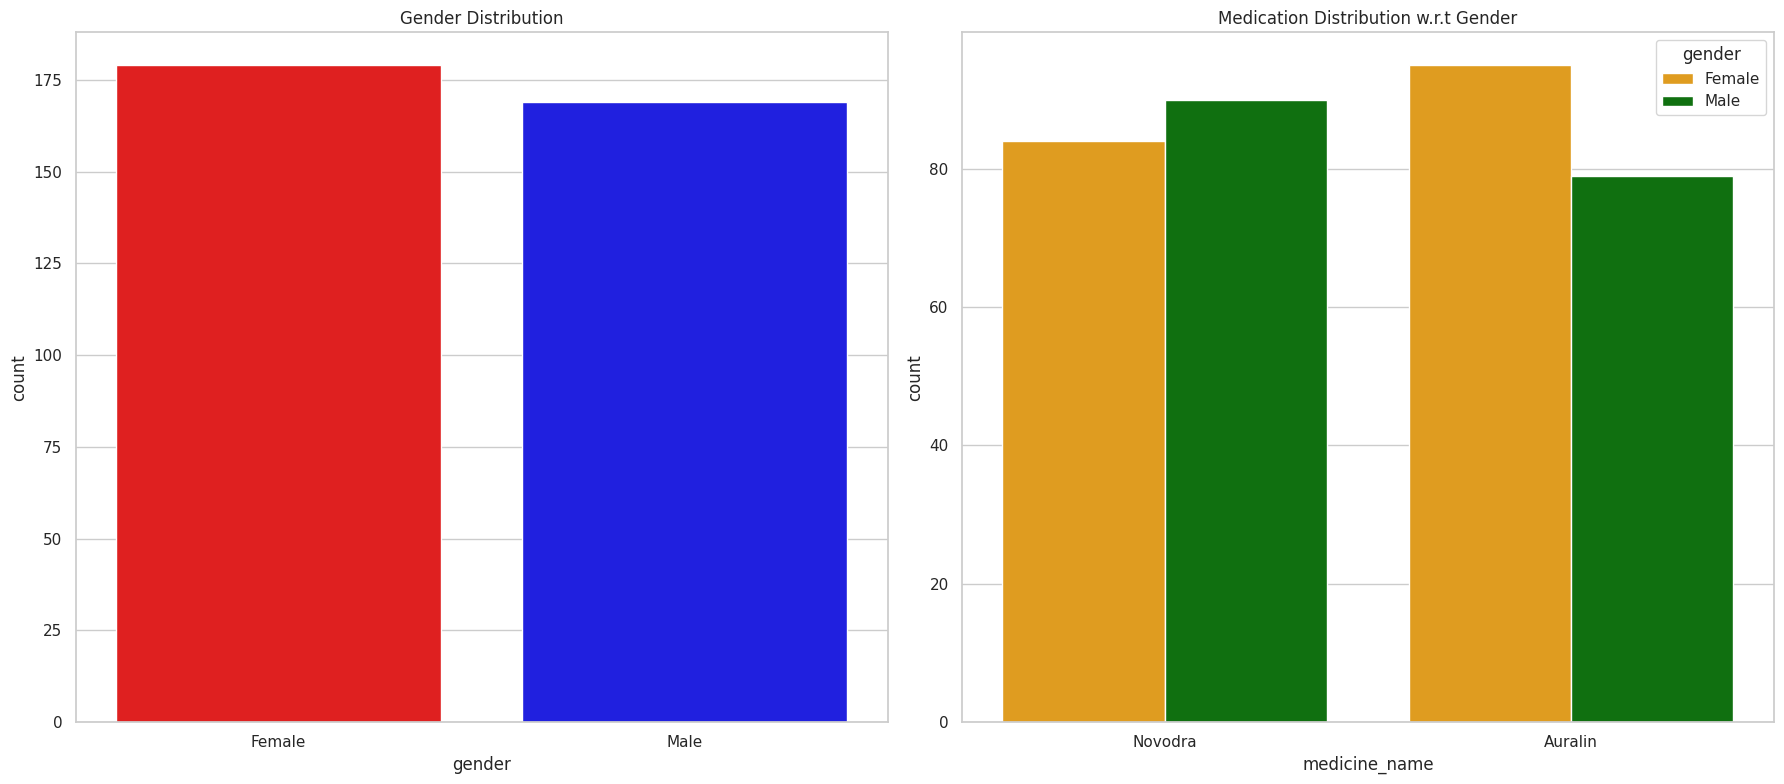

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='gender', data=final,hue='gender', palette=['red','blue'], ax=axes[0])
axes[0].set_title('Gender Distribution')

sns.countplot(x='medicine_name', data=final,hue='gender',palette=['orange','green'], ax=axes[1])
axes[1].set_title('Medication Distribution w.r.t Gender')


plt.tight_layout()
plt.show()

**Insights** :

  * 'Gender Distribution' plot shows equal distribution between genders, which suggests not heavily skewd.
  * Medication Distribution with respect to Gender shows that plot suggesting Aurilin seems to be more in quantity when it cimes to Female Subjects as compared to male, and this scenario is opposite in case of Novodra.
  * Further Analysis could involve exploring other factors such as dosage duration ann dosage diff, and also further statistical tests need to be performed.



In [ ]:
final_reactions = treat_and_reac
final_reactions.head()

,first_name,last_name,hba1c_start,hba1c_end,hba1c_change,full_name,adverse_reaction,trial_dosage
0,Abdul-Nur,Isa,7.98,7.53,0.45,abdul-nur isa,Hypoglycemia,54u - 50u
1,Abel,Yonatan,7.88,7.50,0.38,abel yonatan,Cough,38u - 39u
2,Albinca,Komavec,7.89,7.46,0.43,albinca komavec,Hypoglycemia,41u - 39u
3,Alex,Crawford,7.69,7.30,0.39,alex crawford,Hypoglycemia,51u - 62u
4,Anenechi,Chidi,7.64,7.31,0.33,anenechi chidi,Hypoglycemia,52u - 61u


### Merging DataFrames:
- `med_reac` combines information from `reactions`, `patients`, and `treatments_info` dataframes based on the 'first_name' column.
- This allows us to analyze adverse reactions in relation to patient demographics and treatment data.

In [ ]:
# adding dosage difference to final reactions table
final_reactions['dosage_diff'] = final_reactions['trial_dosage'].apply(lambda x : int(x.split('u -')[1][:3]) - int(x.split('u -')[0]))
final_reactions = final_reactions.rename(columns={'larst_name' : 'last_name'})

final_reactions.head()

,first_name,last_name,hba1c_start,hba1c_end,hba1c_change,full_name,adverse_reaction,trial_dosage,dosage_diff
0,Abdul-Nur,Isa,7.98,7.53,0.45,abdul-nur isa,Hypoglycemia,54u - 50u,-4
1,Abel,Yonatan,7.88,7.50,0.38,abel yonatan,Cough,38u - 39u,1
2,Albinca,Komavec,7.89,7.46,0.43,albinca komavec,Hypoglycemia,41u - 39u,-2
3,Alex,Crawford,7.69,7.30,0.39,alex crawford,Hypoglycemia,51u - 62u,11
4,Anenechi,Chidi,7.64,7.31,0.33,anenechi chidi,Hypoglycemia,52u - 61u,9


In [ ]:
final.columns

Index(['patient_id', 'gender', 'first_name', 'last_name', 'birthdate',
       'weight', 'height', 'bmi', 'full_name', 'hba1c_start', 'hba1c_end',
       'hba1c_change', 'medicine_name', 'trial_dosage', 'dosage_diff', 'age',
       'bmi_category', 'age_category'],
      dtype='object')

In [ ]:
final_reactions.columns

Index(['first_name', 'last_name', 'hba1c_start', 'hba1c_end', 'hba1c_change',
       'full_name', 'adverse_reaction', 'trial_dosage', 'dosage_diff'],
      dtype='object')

In [ ]:
final_reactions = pd.merge(final, final_reactions, on='full_name', how='inner')

In [ ]:
final_reactions.head()

,patient_id,gender,first_name_x,last_name_x,birthdate,weight,height,bmi,full_name,hba1c_start_x,...,bmi_category,age_category,first_name_y,last_name_y,hba1c_start_y,hba1c_end_y,hba1c_change_y,adverse_reaction,trial_dosage_y,dosage_diff_y
0,12,Male,Abdul-Nur,Isa,1954-02-03,238.7,73,31.5,abdul-nur isa,7.98,...,Obese,Senior Citizen,Abdul-Nur,Isa,7.98,7.53,0.45,Hypoglycemia,54u - 50u,-4
1,259,Male,Abel,Yonatan,1952-04-29,137.9,66,22.3,abel yonatan,7.88,...,Normal,Senior Citizen,Abel,Yonatan,7.88,7.50,0.38,Cough,38u - 39u,1
2,38,Female,Albinca,Komavec,1986-06-05,189.9,66,30.6,albinca komavec,7.89,...,Obese,Adults,Albinca,Komavec,7.89,7.46,0.43,Hypoglycemia,41u - 39u,-2
3,277,Male,Alex,Crawford,1924-07-07,223.1,70,32.0,alex crawford,7.69,...,Obese,Elderly,Alex,Crawford,7.69,7.30,0.39,Hypoglycemia,51u - 62u,11
4,14,Female,Anenechi,Chidi,1961-03-07,228.4,67,35.8,anenechi chidi,7.64,...,Obese,Senior Citizen,Anenechi,Chidi,7.64,7.31,0.33,Hypoglycemia,52u - 61u,9


In [ ]:

# renaming columns
final_reactions = final_reactions.rename(columns={'first_name_x' : 'first_name', 'last_name_x' : 'last_name', 'hba1c_start_x':'hba1c_start', 'hba1c_end_x':'hba1c_end','hba1c_change_x':'hba1c_change', 'trial_dosage_x':'trial_dosage', 'dosage_diff_x':'dosage_diff'})

# # dropping unnecessary columns
final_reactions = final_reactions.drop(['first_name_y', 'last_name_y', 'hba1c_start_y', 'hba1c_end_y', 'hba1c_change_y', 'trial_dosage_y', 'dosage_diff_y'], axis=1)

In [ ]:
# final_reactions.columns

In [ ]:
# adding age column :
today = pd.Timestamp('today')
final_reactions['birthdate'] = pd.to_datetime(final_reactions['birthdate'])
final_reactions['age'] = 2017 - final_reactions['birthdate'].dt.year

# adding BMI-category column :
final_reactions['bmi_category'] = final_reactions['bmi'].apply(lambda x : 'Underweight' if(x < 18.5) else('Normal' if (x>=18.5 and x<=24.9) else('Overweight' if (x>=25.0 and x<=29.9) else 'Obese')))

In [ ]:
# adding age category column
final_reactions['age_category'] = final_reactions['age'].apply(lambda x : 'Children' if (x>=3 and x<13) else('Teenage' if (x>=13 and x<=19) else('Young Adults' if (x>19 and x<=29) else('Adults') if (x>29 and x<=39) else('Middle-Aged Adults' if (x>39 and x<=55) else('Senior Citizen' if(x>55 and x<=75) else'Elderly')))))

In [ ]:
final_reactions = final_reactions.drop(['patient_id'], axis=1)
final_reactions.head()

,gender,first_name,last_name,birthdate,weight,height,bmi,full_name,hba1c_start,hba1c_end,hba1c_change,medicine_name,trial_dosage,dosage_diff,age,bmi_category,age_category,adverse_reaction
0,Male,Abdul-Nur,Isa,1954-02-03,238.7,73,31.5,abdul-nur isa,7.98,7.53,0.45,Novodra,54u - 50u,-4,63,Obese,Senior Citizen,Hypoglycemia
1,Male,Abel,Yonatan,1952-04-29,137.9,66,22.3,abel yonatan,7.88,7.50,0.38,Novodra,38u - 39u,1,65,Normal,Senior Citizen,Cough
2,Female,Albinca,Komavec,1986-06-05,189.9,66,30.6,albinca komavec,7.89,7.46,0.43,Novodra,41u - 39u,-2,31,Obese,Adults,Hypoglycemia
3,Male,Alex,Crawford,1924-07-07,223.1,70,32.0,alex crawford,7.69,7.30,0.39,Auralin,51u - 62u,11,93,Obese,Elderly,Hypoglycemia
4,Female,Anenechi,Chidi,1961-03-07,228.4,67,35.8,anenechi chidi,7.64,7.31,0.33,Auralin,52u - 61u,9,56,Obese,Senior Citizen,Hypoglycemia


### Calculating accurate BMI indices :

In [ ]:
# function to calculate BMI index :
def calculate_bmi(weight_lb, height_in, age_yr):
    weight_kg = weight_lb * 0.453592
    height_m = height_in * 0.0254
    bmi = weight_kg / (height_m ** 2)
    return round(bmi, 1)
# print(calculate_bmi())
final_reactions['bmi'] = calculate_bmi(final_reactions['weight'], final_reactions['height'], final_reactions['age'])

In [ ]:
final_reactions.head()

,gender,first_name,last_name,birthdate,weight,height,bmi,full_name,hba1c_start,hba1c_end,hba1c_change,medicine_name,trial_dosage,dosage_diff,age,bmi_category,age_category,adverse_reaction
0,Male,Abdul-Nur,Isa,1954-02-03,238.7,73,31.5,abdul-nur isa,7.98,7.53,0.45,Novodra,54u - 50u,-4,63,Obese,Senior Citizen,Hypoglycemia
1,Male,Abel,Yonatan,1952-04-29,137.9,66,22.3,abel yonatan,7.88,7.50,0.38,Novodra,38u - 39u,1,65,Normal,Senior Citizen,Cough
2,Female,Albinca,Komavec,1986-06-05,189.9,66,30.7,albinca komavec,7.89,7.46,0.43,Novodra,41u - 39u,-2,31,Obese,Adults,Hypoglycemia
3,Male,Alex,Crawford,1924-07-07,223.1,70,32.0,alex crawford,7.69,7.30,0.39,Auralin,51u - 62u,11,93,Obese,Elderly,Hypoglycemia
4,Female,Anenechi,Chidi,1961-03-07,228.4,67,35.8,anenechi chidi,7.64,7.31,0.33,Auralin,52u - 61u,9,56,Obese,Senior Citizen,Hypoglycemia


# **Data extracted until now, which are helpful in determining wether or not "Auralin" can replace "Novodra"** :

**Final Data of Patients that had no Adverse Reactions Symptoms during Trial Period(final_without_reactions) :**

In [ ]:
# Dataset - 1 : final_without_reactions

full_name = final_reactions['full_name'].to_list()
final_without_reactions = final[~final['full_name'].isin(full_name)]

# dropping 'patient_id' column

final_without_reactions = final_without_reactions.drop(['patient_id'], axis=1)

# final_without_reactions.info()

In [ ]:
final_without_reactions.head()

,gender,first_name,last_name,birthdate,weight,height,bmi,full_name,hba1c_start,hba1c_end,hba1c_change,medicine_name,trial_dosage,dosage_diff,age,bmi_category,age_category
0,Female,Aaliyah,Rice,1936-07-14,123.0,65,20.5,aaliyah rice,7.64,7.33,0.31,Novodra,31u - 31u,0,81,Normal,Elderly
3,Female,Addolorata,Lombardi,1962-10-19,189.0,65,31.4,addolorata lombardi,7.75,7.33,0.42,Novodra,49u - 46u,-3,55,Obese,Middle-Aged Adults
4,Male,Adib,Ghanem,1967-12-31,254.5,72,34.5,adib ghanem,7.59,7.12,0.47,Novodra,46u - 49u,3,50,Obese,Middle-Aged Adults
5,Male,Adlan,Shishani,1940-05-23,200.9,69,29.7,adlan shishani,7.84,7.37,0.47,Novodra,43u - 40u,-3,77,Overweight,Elderly
6,Male,Aksel,Vestergaard,1988-05-02,187.2,78,21.6,aksel vestergaard,9.62,9.29,0.33,Novodra,42u - 38u,-4,29,Normal,Young Adults


**Final Data of Patients that had suffered Adverse Reactions Symptoms during Trial Period(final_with_reactions) :**


In [ ]:
# Dataset - 2 :
final_with_reactions = final_reactions

final_with_reactions.head()

,gender,first_name,last_name,birthdate,weight,height,bmi,full_name,hba1c_start,hba1c_end,hba1c_change,medicine_name,trial_dosage,dosage_diff,age,bmi_category,age_category,adverse_reaction
0,Male,Abdul-Nur,Isa,1954-02-03,238.7,73,31.5,abdul-nur isa,7.98,7.53,0.45,Novodra,54u - 50u,-4,63,Obese,Senior Citizen,Hypoglycemia
1,Male,Abel,Yonatan,1952-04-29,137.9,66,22.3,abel yonatan,7.88,7.50,0.38,Novodra,38u - 39u,1,65,Normal,Senior Citizen,Cough
2,Female,Albinca,Komavec,1986-06-05,189.9,66,30.7,albinca komavec,7.89,7.46,0.43,Novodra,41u - 39u,-2,31,Obese,Adults,Hypoglycemia
3,Male,Alex,Crawford,1924-07-07,223.1,70,32.0,alex crawford,7.69,7.30,0.39,Auralin,51u - 62u,11,93,Obese,Elderly,Hypoglycemia
4,Female,Anenechi,Chidi,1961-03-07,228.4,67,35.8,anenechi chidi,7.64,7.31,0.33,Auralin,52u - 61u,9,56,Obese,Senior Citizen,Hypoglycemia


# **Main EDA and Statistical Analysis to Draw conclusions and reports**

## **Table-1 -> "final_without_reactions DataFrame" Vizual Analysis(Only)**

In [ ]:
final_without_reactions.head()

,gender,first_name,last_name,birthdate,weight,height,bmi,full_name,hba1c_start,hba1c_end,hba1c_change,medicine_name,trial_dosage,dosage_diff,age,bmi_category,age_category
0,Female,Aaliyah,Rice,1936-07-14,123.0,65,20.5,aaliyah rice,7.64,7.33,0.31,Novodra,31u - 31u,0,81,Normal,Elderly
3,Female,Addolorata,Lombardi,1962-10-19,189.0,65,31.4,addolorata lombardi,7.75,7.33,0.42,Novodra,49u - 46u,-3,55,Obese,Middle-Aged Adults
4,Male,Adib,Ghanem,1967-12-31,254.5,72,34.5,adib ghanem,7.59,7.12,0.47,Novodra,46u - 49u,3,50,Obese,Middle-Aged Adults
5,Male,Adlan,Shishani,1940-05-23,200.9,69,29.7,adlan shishani,7.84,7.37,0.47,Novodra,43u - 40u,-3,77,Overweight,Elderly
6,Male,Aksel,Vestergaard,1988-05-02,187.2,78,21.6,aksel vestergaard,9.62,9.29,0.33,Novodra,42u - 38u,-4,29,Normal,Young Adults


**To see how many doses are needed to be effective in each medicine type for patients with no adverse reaction:**

In [ ]:
mean_dosage_diff_no_reactions = final_without_reactions.groupby('medicine_name')['dosage_diff'].mean()
print(mean_dosage_diff_no_reactions)

medicine_name
Auralin    8.306250
Novodra   -0.331169
Name: dosage_diff, dtype: float64


**Main focus => "Medicine Type" => Part-1 :**

1. medicine vs gender
2. medicine vs bmi
3. medicine vs age

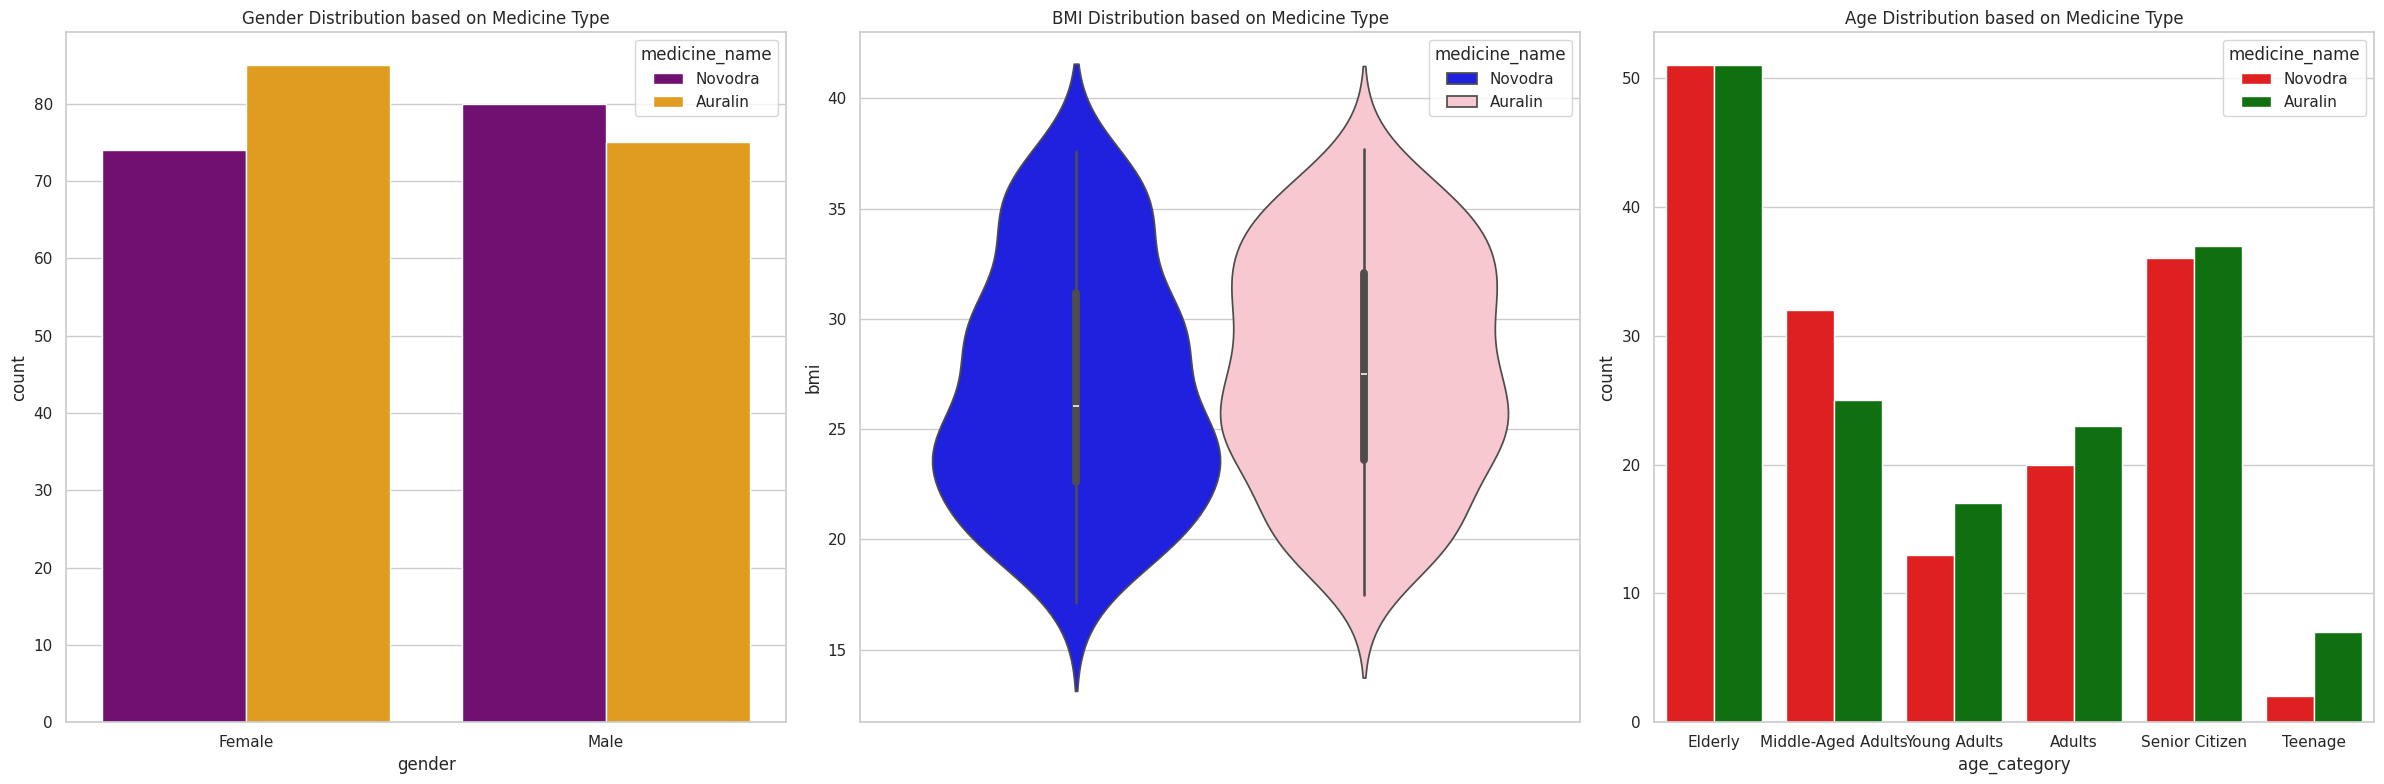

In [ ]:
# Medicine vs Gender, age, BMI

fig, axs = plt.subplots(1, 3, figsize=(24,8))

sns.countplot(data=final_without_reactions, x='gender', hue='medicine_name', palette=['purple', 'orange'], ax=axs[0])
axs[0].set_title("Gender Distribution based on Medicine Type")

sns.violinplot(data=final_without_reactions, y='bmi', hue='medicine_name',palette=['blue','pink'], ax=axs[1])
axs[1].set_title("BMI Distribution based on Medicine Type")

sns.countplot(data=final_without_reactions, x='age_category', hue='medicine_name', palette=['red','green'], ax=axs[2])
axs[2].set_title("Age Distribution based on Medicine Type")

plt.tight_layout()
plt.show()

**Insights** :

  1. Plot-1 -> Gender Vs Medicine Type :
    * We can clearly see that Auralin in Female is higher than Male group.
    * We can also see that Novodra is somewhat equally distributed amognst the 2 genders.
  
  2. Plot-2 -> BMI Vs Medicine Type :
    * We can observe that in the case of Novodra, The patients BMI spread seems to be in major for normal people bmi range i.e., (20 <= BMI <= 28), which suggests that novodra is consumed by healthy and little overweight patients, spread seems to be decreasing when it comes to obese patients.
    * Here can clearly observe that aurlain is equally consumed by patients with diverse BMI range i.e.m fat to healthy and even underweight in some cases.
  
  3. Plot-3 -> Age vs Medicine Type :
    * WE can observe that, there is some disparity when it comes to middle-afed, adults and Teenagers in both medicine type.
  
  4. Based on these findings, further tests need to be performed.


**Main focus => "Medicine Type" => Part-2 :**
4. medicine vs bmi category
5. medicine vs dosage diff
6. medicine vs hba1c_change

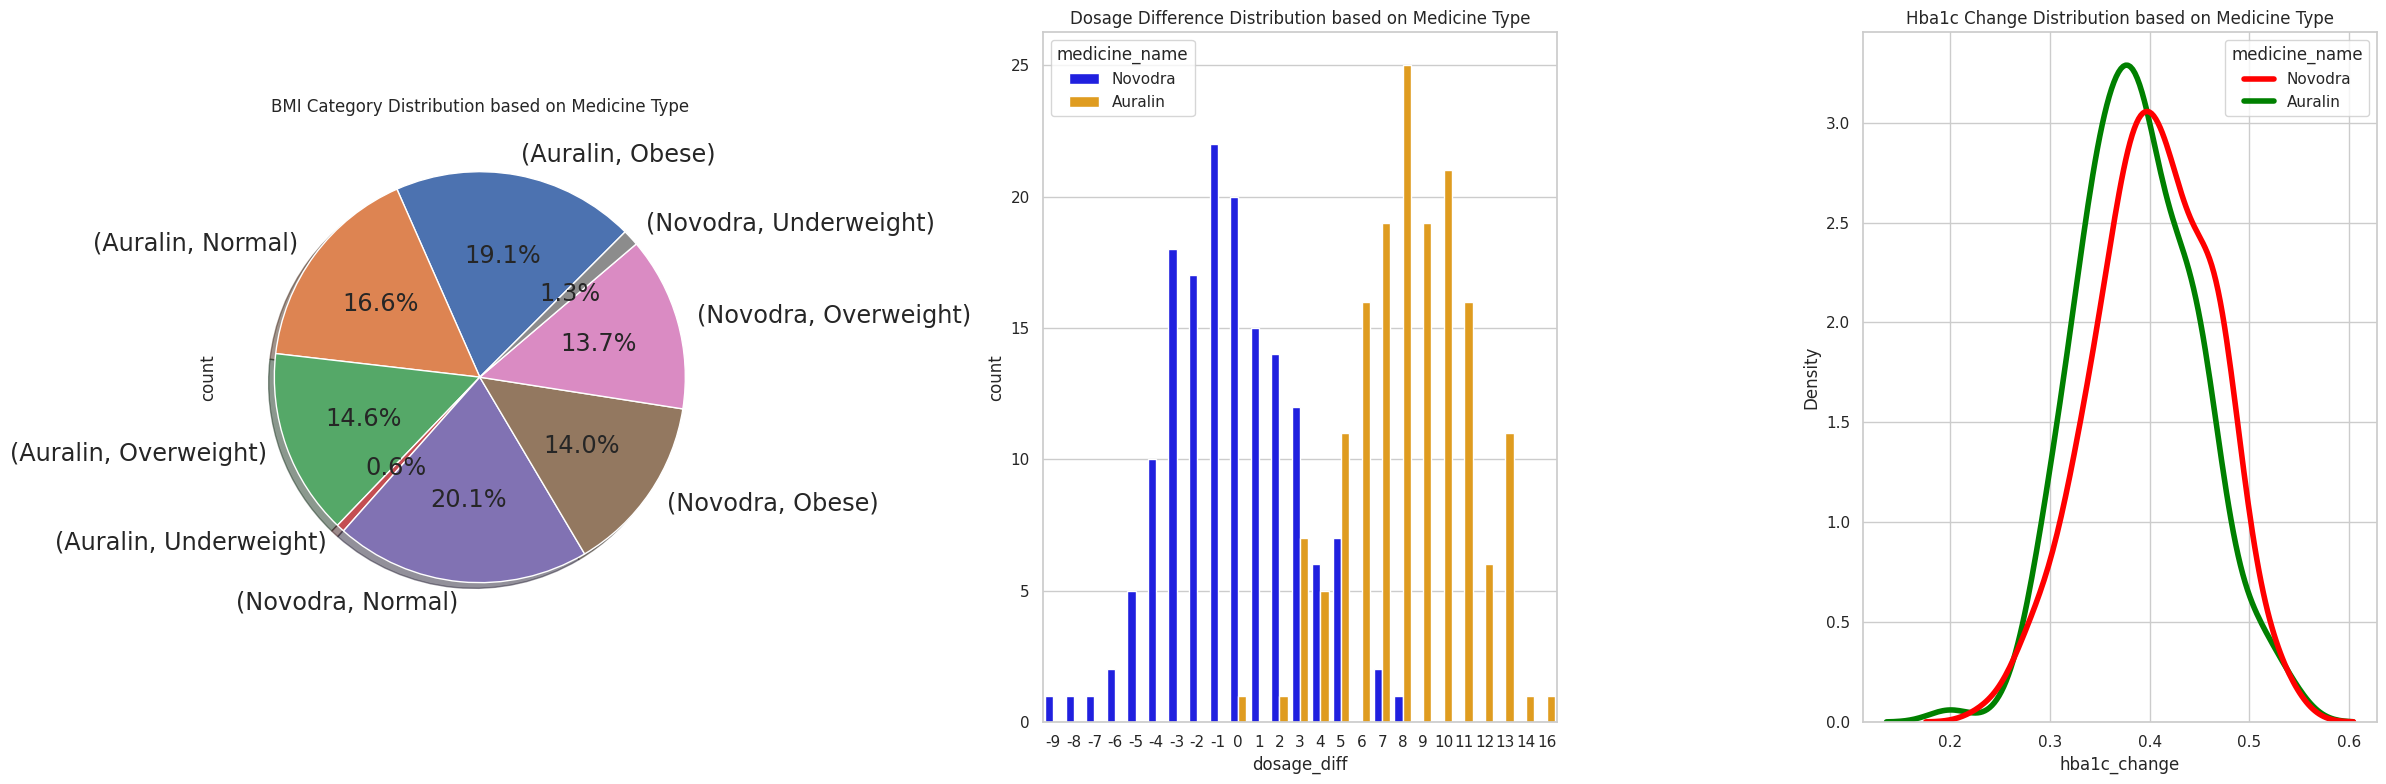

In [ ]:
# Medicine vs BMI category, dosage difference and hba1c_change

fig, axs = plt.subplots(1, 3, figsize=(24,8))

# sns.countplot(data=final, x='bmi_category', hue='medicine_name', palette=['purple', 'green'], ax=axs[0])
final_without_reactions.groupby('medicine_name')['bmi_category'].value_counts().plot(kind='pie', autopct='%1.1f%%',shadow=True,startangle=45,textprops={'size': 'x-large'}, ax=axs[0])
axs[0].set_title("BMI Category Distribution based on Medicine Type")

sns.countplot(data=final_without_reactions.sort_values(by='dosage_diff'), x='dosage_diff', hue='medicine_name', palette=['blue','orange'], ax=axs[1])
axs[1].set_title("Dosage Difference Distribution based on Medicine Type")

sns.kdeplot(data=final_without_reactions, x='hba1c_change',  hue='medicine_name',palette=['red','green'], lw=4, ax=axs[2])
axs[2].set_title("Hba1c Change Distribution based on Medicine Type")

plt.tight_layout()
plt.show()

**Insights** :

  1. Plot-1 -> Bmi Category Vs Medicine Type :

      * We can observe that the 2 Medicine Types are distributed amongst the diverse range of bmi category range in the folloewing order.
      1. Normal [36.7%] -> Novodra with 20.1% and Auralin with 16.6%.
      2. Underweight [1.9%] -> Novodra with 1.3% and Auralin with 0.6%.
      3. Overweight [28.3%] -> Novodra with 13.7% and Auralin with 14.6%.
      4. Obese [33.1%] -> Novodra with 14% and Auralin with 19.1%.
         * From this we can see that, "Auralin" is being tested on all bmi category people unlike what we see in novodra, and if it turns out to be better than or equal to "Novodra", we can replace them.
  
  2. Plot-2 -> Dosage Difference Vs Medicine Type :
    
     * We can observe that dosage amongst "Auralin" patients were gradually increased throughout the trial period, unlike the "Novodra" patients, who had their dosage slightly modify along the trial period.
     * We can observe that "Novodra" has less Dosage Difference in more number of patients, unlike "Auralin", which suggests that during trial period, less modifications were done to Novodra patients as compared to others.
  
  3. Plot-3 -> Hba1c Change Vs Medicine Type :

     * We can see the Hba1c Change distributions, further normality test needed.







### **Statistical Tests for "Patients with No Adverse Reactions" :**

**1. Two Sample t-test, To compare the effect of each medicine on HbA1c levels between genders.**

In [ ]:
from scipy.stats import ttest_ind

# Null Hypothesis (H0) : "The mean HbA1c change (hba1c_change) is the same for both genders (Male and Female) for each medicine"

# Alternative Hypothesis (H1) : "There is a significant difference in the mean HbA1c change between genders (Male and Female) for each medicine."

# Split data by medicine and gender
male_data = final_without_reactions[final_without_reactions['gender'] == 'Male']
female_data = final_without_reactions[final_without_reactions['gender'] == 'Female']

# Perform t-test for each medicine
medicine1_male = male_data[male_data['medicine_name'] == 'Novodra']
medicine1_female = female_data[female_data['medicine_name'] == 'Auralin']
t_stat, p_val = ttest_ind(medicine1_male['hba1c_change'], medicine1_female['hba1c_change'], equal_var=True)

print("Statistical Values for Medicine Vs Reactions : \n", f"T - Statistics : {t_stat}\n", f"P - Value : {p_val}")
print()
if(p_val < 0.05):
  print("Reject 'H0', significant Hba1c difference between genders")
else:
  print("Fail to reject 'H0', no significant Hba1c difference between genders")

Statistical Values for Medicine Vs Reactions : 
 T - Statistics : 1.8464768989118772
 P - Value : 0.06663636950592404

Fail to reject 'H0', no significant Hba1c difference between genders


**2. Analysis of Variance (ANOVA)-test, To compare the effect of each medicine on HbA1c levels across all AGE categories.**

In [ ]:
from scipy.stats import f_oneway, ttest_ind

# Null Hypothesis (H0) : "The mean HbA1c change (hba1c_change) is the same across all age categories for each medicine."

# Alternative Hypothesis (H1) : "There is a significant difference in the mean HbA1c change between at least two age categories for each medicine."

# Split data by medicine and age category
medicine1_data = final_without_reactions[final_without_reactions['medicine_name'] == 'Novodra']
medicine2_data = final_without_reactions[final_without_reactions['medicine_name'] == 'Auralin']

# ANOVA
f_stat_N, p_val_N = f_oneway(*[medicine1_data[medicine1_data['age_category'] == cat]['hba1c_change'] for cat in medicine1_data['age_category'].unique()])
f_stat_A, p_val_A = f_oneway(*[medicine2_data[medicine2_data['age_category'] == cat]['hba1c_change'] for cat in medicine2_data['age_category'].unique()])

# Perform t-test
# t_stat, p_val = ttest_ind(medicine1_data[medicine1_data['AGE_CATEGORY'] == 'Young'], medicine1_data[medicine1_data['AGE_CATEGORY'] == 'Old']['hba1c_change'], equal_var=True)

print("Statistical Values for Novodra Vs Age Category : \n", f"T - Statistics Novodra : {f_stat_N}\n", f"P - Value Novodra : {p_val_N}")
print()
print("Statistical Values for Auralin Vs Age Category : \n", f"T - Statistics Auralin : {f_stat_A}\n", f"P - Value Auralin : {p_val_A}")
print()
if(p_val_N < 0.05):
  print("Reject 'H0', significant Hba1c difference across all the age categories for Novodra")
else:
  print("Fail to reject 'H0', no significant Hba1c difference across all the age categories for Novodra")
  print()
if(p_val_A < 0.05):
  print("Reject 'H0', significant Hba1c difference across all the age categories for Auralin")
else:
  print("Fail to reject 'H0', no significant Hba1c ifference across all the age categories for Auralin")

Statistical Values for Novodra Vs Age Category : 
 T - Statistics Novodra : 0.5280829145764934
 P - Value Novodra : 0.7547422925256403

Statistical Values for Auralin Vs Age Category : 
 T - Statistics Auralin : 0.9707374304513035
 P - Value Auralin : 0.4376061460754018

Fail to reject 'H0', no significant Hba1c difference across all the age categories for Novodra

Fail to reject 'H0', no significant Hba1c ifference across all the age categories for Auralin


**3. Analysis of Variance (ANOVA)-test, To compare the effect of each medicine on HbA1c levels across all BMI categories.**

In [ ]:
from scipy.stats import f_oneway, ttest_ind

# Null Hypothesis (H0) : "The mean HbA1c change (hba1c_change) is the same across all BMI categories for each medicine."

# Alternative Hypothesis (H1) : "There is a significant difference in the mean HbA1c change between at least two BMI categories for each medicine."

# Split data by medicine and age category
medicine1_data = final_without_reactions[final_without_reactions['medicine_name'] == 'Novodra']
medicine2_data = final_without_reactions[final_without_reactions['medicine_name'] == 'Auralin']

# ANOVA
f_stat_N, p_val_N = f_oneway(*[medicine1_data[medicine1_data['bmi_category'] == cat]['hba1c_change'] for cat in medicine1_data['bmi_category'].unique()])
f_stat_A, p_val_A = f_oneway(*[medicine2_data[medicine2_data['bmi_category'] == cat]['hba1c_change'] for cat in medicine2_data['bmi_category'].unique()])

# Perform t-test
# t_stat, p_val = ttest_ind(medicine1_data[medicine1_data['AGE_CATEGORY'] == 'Young'], medicine1_data[medicine1_data['AGE_CATEGORY'] == 'Old']['hba1c_change'], equal_var=True)

print("Statistical Values for Novodra Vs BMI Category : \n", f"T - Statistics Novodra : {f_stat_N}\n", f"P - Value Novodra : {p_val_N}")
print()
print("Statistical Values for Auralin Vs BMI Category : \n", f"T - Statistics Auralin : {f_stat_A}\n", f"P - Value Auralin : {p_val_A}")
print()
if(p_val_N < 0.05):
  print("Reject 'H0', significant Hba1c difference across all the bmi categories for Novodra")
else:
  print("Fail to reject 'H0', no significant Hba1c difference across all the bmi categories for Novodra")
  print()
if(p_val_A < 0.05):
  print("Reject 'H0', significant Hba1c difference across all the bmi categories for Auralin")
else:
  print("Fail to reject 'H0', no significant Hba1c difference across all the bmi categories for Auralin")

Statistical Values for Novodra Vs BMI Category : 
 T - Statistics Novodra : 3.936998322748624
 P - Value Novodra : 0.009718656221769215

Statistical Values for Auralin Vs BMI Category : 
 T - Statistics Auralin : 0.9678478393156952
 P - Value Auralin : 0.40953211913899523

Reject 'H0', significant Hba1c difference across all the bmi categories for Novodra
Fail to reject 'H0', no significant Hba1c difference across all the bmi categories for Auralin


**4. Two Sample t-test, To compare the effect of each medicine on Dosage Difference**

In [ ]:
from scipy.stats import ttest_ind

# Null Hypothesis (H0) : "The mean Dosage Difference change is the same for each medicine"

# Alternative Hypothesis (H1) : "There is a significant difference in the mean Dosage Difference for each medicine."

# Perform t-test for each medicine
med1 = final_without_reactions[final_without_reactions['medicine_name'] == 'Novodra']
med2 = final_without_reactions[final_without_reactions['medicine_name'] == 'Auralin']
t_stat, p_val = ttest_ind(med1['dosage_diff'], med2['dosage_diff'], equal_var=True)

print("Statistical Values for Medicine Vs Dosage : \n", f"T - Statistics : {t_stat}\n", f"P - Value : {p_val}")
print()
if(p_val < 0.05):
  print("Reject 'H0', significant Dosage difference between genders")
else:
  print("Fail to reject 'H0', no significant Dosage difference between genders")

Statistical Values for Medicine Vs Dosage : 
 T - Statistics : -26.31302850524254
 P - Value : 3.365088365172767e-81

Reject 'H0', significant Dosage difference between genders


### **Summary of all the statistical test performed on patients with No Adverse Reaction :**

  1. In the case of comparing the Hba1c Change levels between two genders, p-value seems to be greater than 0.05.
   * [ p-value = 0.066 ], which suggests there is no such significant difference between Hba1c Change levels between the two genders.

  2. In the case of comparing the Hba1c Change levels across all AGE categories, p-value in both the medicine type seems to be greater than 0.05.
   * [ p-value-Novodra = 0.75, p-value-Auralin = 0.43 ], which suggests there is no such significant difference between Hba1c Change levels amongst all age categories.

  3. In the case of comparing the Hba1c Change levels across all BMI categories, p-value in both the medicine type seems to be different than 0.05.
   * [ p-value-Novodra = 0.009, p-value-Auralin = 0.409 ], which suggests there is no such significant difference between Hba1c Change levels for "Auralin" the amongst all age categories unlike f0r "Novodra".

  4. In the case of comparing the Hba1c Change levels between two genders, p-value seems to be greater than 0.05.
   * [ p-value = 3.365e^-81 ], which suggests there is significant difference between Dosage Difference levels.


## **Table-2 -> "final_with_reactions DataFrame" Complete Analysis(EDA + Stats)**

* **This is our Main Deciding Data**.



In [ ]:
final_with_reactions.head()

,gender,first_name,last_name,birthdate,weight,height,bmi,full_name,hba1c_start,hba1c_end,hba1c_change,medicine_name,trial_dosage,dosage_diff,age,bmi_category,age_category,adverse_reaction
0,Male,Abdul-Nur,Isa,1954-02-03,238.7,73,31.5,abdul-nur isa,7.98,7.53,0.45,Novodra,54u - 50u,-4,63,Obese,Senior Citizen,Hypoglycemia
1,Male,Abel,Yonatan,1952-04-29,137.9,66,22.3,abel yonatan,7.88,7.50,0.38,Novodra,38u - 39u,1,65,Normal,Senior Citizen,Cough
2,Female,Albinca,Komavec,1986-06-05,189.9,66,30.7,albinca komavec,7.89,7.46,0.43,Novodra,41u - 39u,-2,31,Obese,Adults,Hypoglycemia
3,Male,Alex,Crawford,1924-07-07,223.1,70,32.0,alex crawford,7.69,7.30,0.39,Auralin,51u - 62u,11,93,Obese,Elderly,Hypoglycemia
4,Female,Anenechi,Chidi,1961-03-07,228.4,67,35.8,anenechi chidi,7.64,7.31,0.33,Auralin,52u - 61u,9,56,Obese,Senior Citizen,Hypoglycemia


**To see how many doses are needed to be effective in each medicine type for patients with reactions:**

In [ ]:
mean_dosage_diff_reactions = final_with_reactions.groupby('medicine_name')['dosage_diff'].mean()
print(mean_dosage_diff_reactions)

medicine_name
Auralin    8.533333
Novodra   -0.800000
Name: dosage_diff, dtype: float64


**Main focus => "Adverse Reactions" => Part-1 :**

 1. Reactions Vs Gender
 2. Reactions Vs BMI
 3. Reactions Vs Age

In [ ]:
final_with_reactions['reactions_by_age'] = final_with_reactions['age_category']+'-'+final_with_reactions['adverse_reaction']

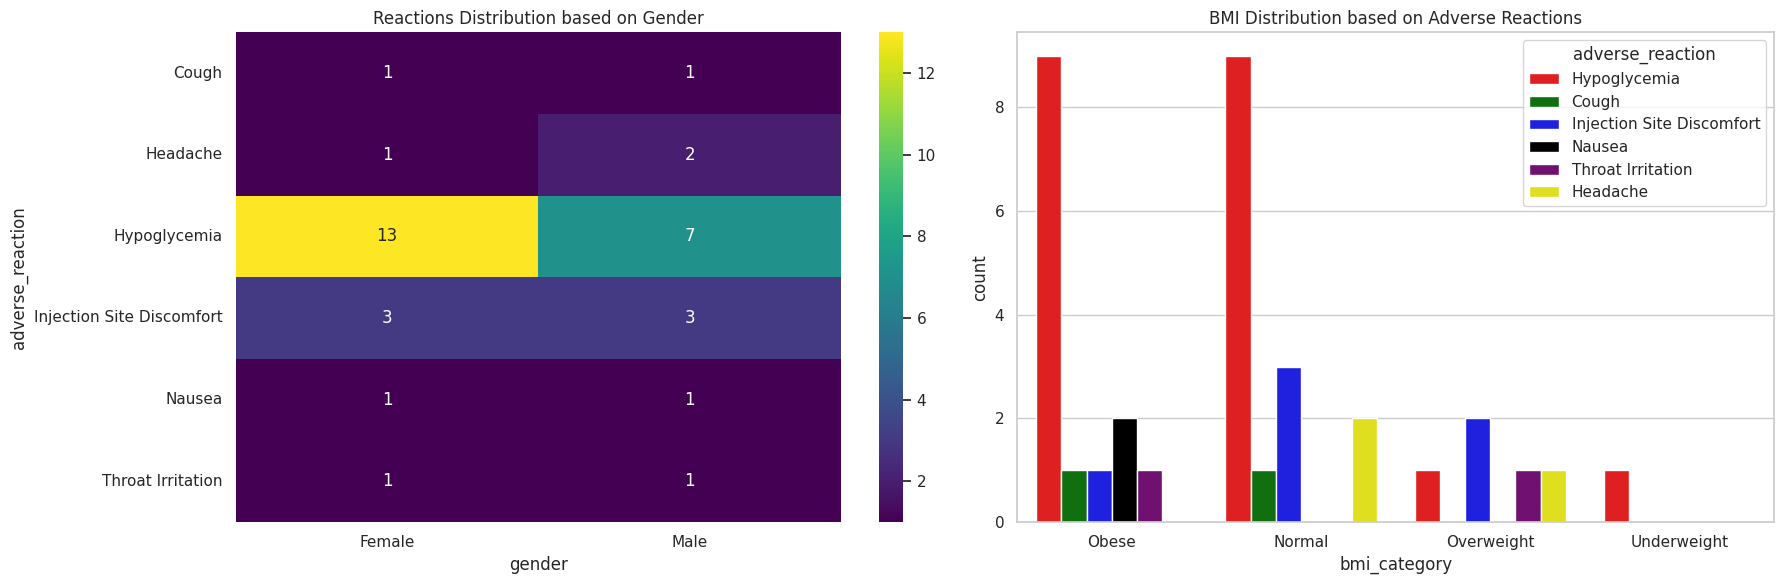

In [ ]:
# Reactions vs Gender and BMI

fig, axs = plt.subplots(1, 2, figsize=(18,6))

df_2dhist = pd.DataFrame({
    x_label: grp['adverse_reaction'].value_counts()
    for x_label, grp in final_reactions.groupby('gender')
})
sns.heatmap(df_2dhist, annot=True,cmap='viridis', ax=axs[0])
axs[0].set_title("Reactions Distribution based on Gender")
axs[0].set_xlabel('gender')
axs[0].set_ylabel('adverse_reaction')
# plt.yticks(rotation=25)

sns.countplot(data=final_with_reactions, x='bmi_category', hue='adverse_reaction',palette=['red', 'green', 'blue', 'black', 'purple', 'Yellow'],  ax=axs[1])
axs[1].set_title("BMI Distribution based on Adverse Reactions")

plt.tight_layout()
plt.show()

**Insights** :

   1. Plot-1 -> Gender Vs reactions

      * We can observe the main adverse reaction being "Hypoglycemia", we can also see that "Hypoglycemia" is much higher in Females as compared to Male Patients.
      * "Hypoglycemia" is also the only adverse reaction/symptom that can cause because of low bllod sugar level(bllod glucose level <= 70 mg/dl).
      * The above points suggest that "Hypoglycemia" and Hba1c change are related i.e., ["Hypoglycemia" <= Inversely Proportional => Hba1c Change].

   2. Plot-2 -> BMI Vs Reactions
      * We can see that "Hypoglycemia" seems to have high impact on patients with high bmi i.e., Obese Patients and Normal/Healthy patients, followed by Injection site discomfort.
      * Other symptoms are almost uniformly distributed amongst all BMI category patients.



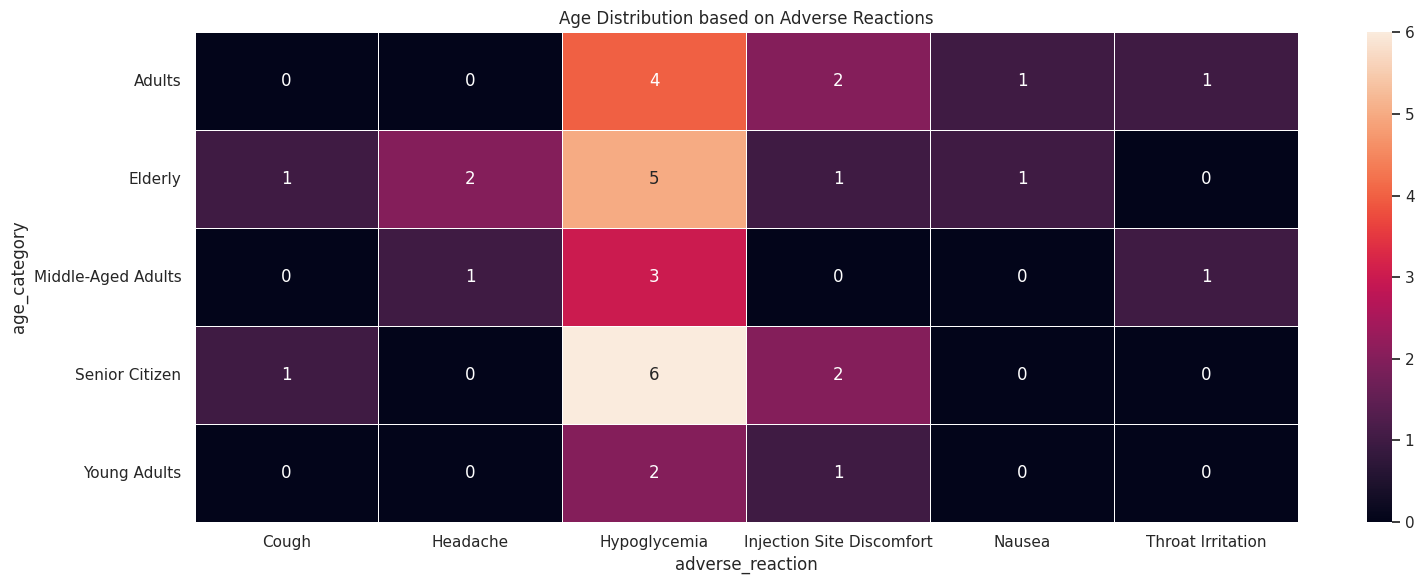

In [ ]:
# Reactions Vs Age Category
plt.figure(figsize=(16,6))

sns.heatmap(pd.crosstab(final_with_reactions['age_category'], final_with_reactions['adverse_reaction']), annot=True, linewidths=0.5)
plt.title("Age Distribution based on Adverse Reactions")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

**Insights from Age Distributions based on Adverse Reactions** :
  
  * Hypoglycemia seems to be a major reaction, this is particularly concerning for the elderly and senior citizens, dur to their health complications.
  * This reactions further need to be studied with respect to the medicine type and their BMI indices.

**Main focus  =>  "Adverse Reactions"  =>  Part-2 :**
4. Reactions Vs Hba1c Change
5. Reactions Vs Medicine Type
6. Reactions Vs Dosage Difference

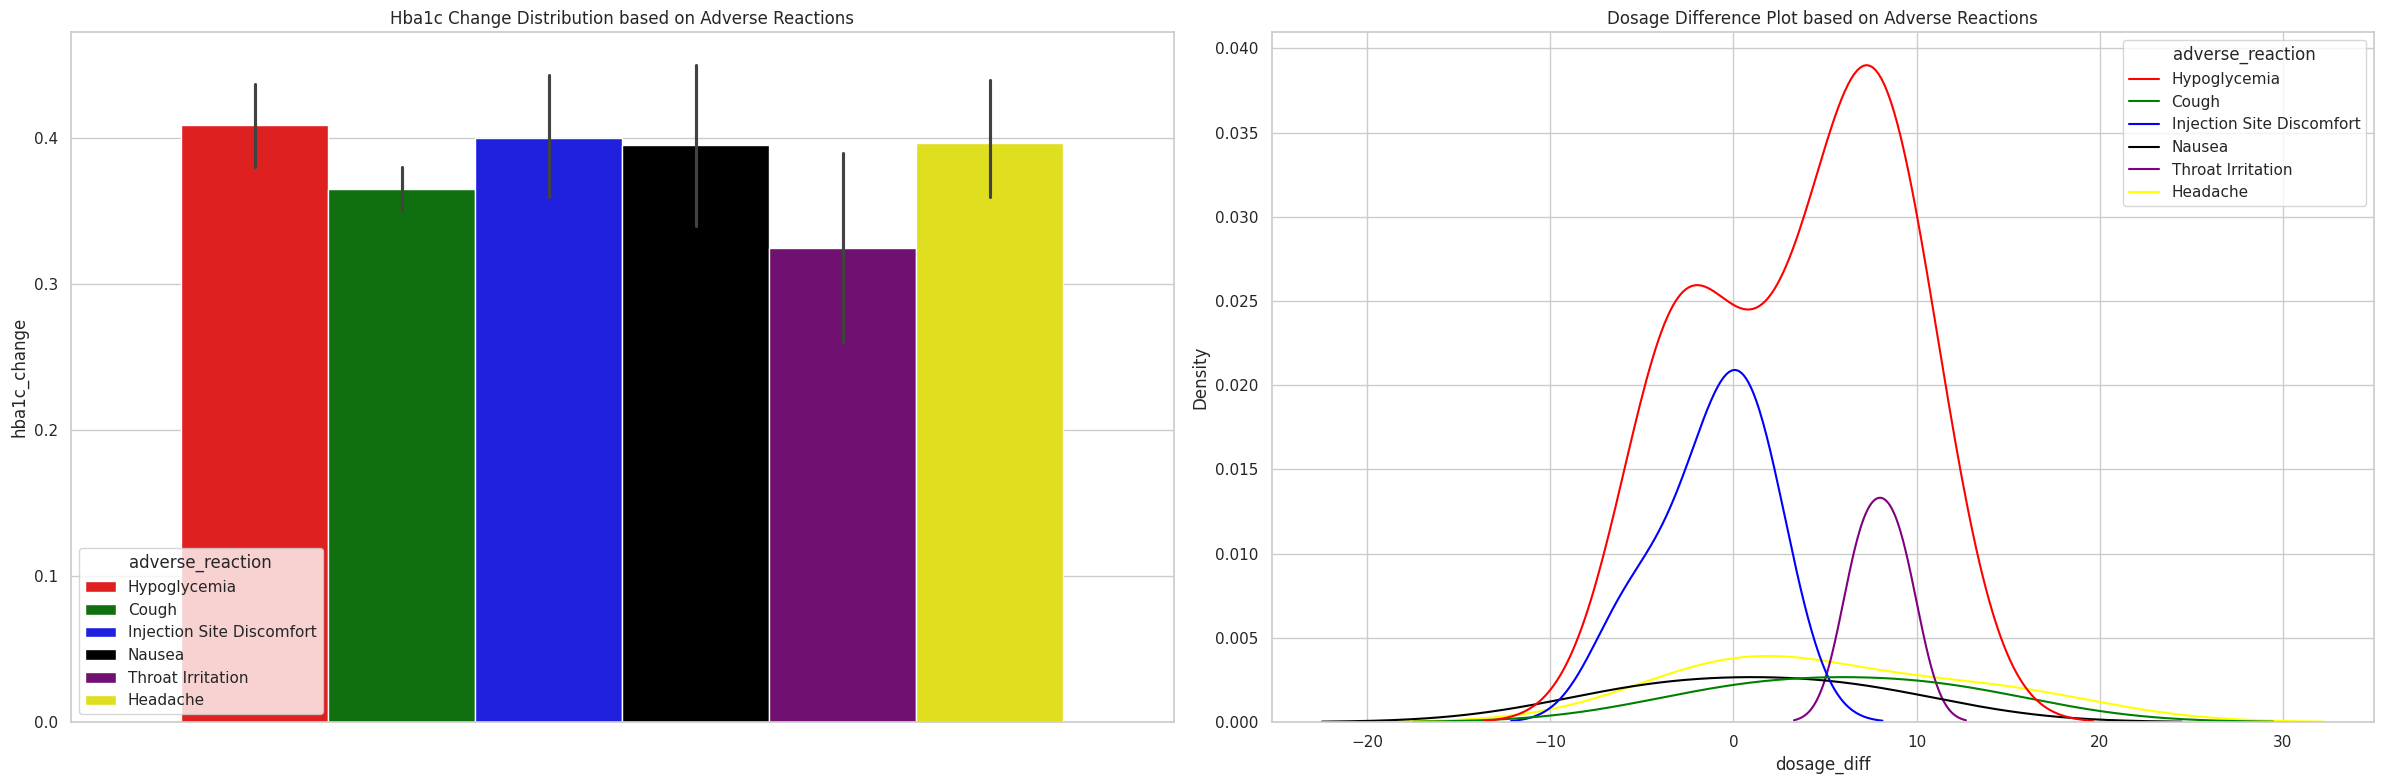

In [ ]:
# Reactions vs Hba1c Change and Dosage Difference

fig, axs = plt.subplots(1, 2, figsize=(24,8))

sns.barplot(data=final_with_reactions, y='hba1c_change', hue='adverse_reaction', palette=['red', 'green', 'blue', 'black', 'purple', 'Yellow'], ax=axs[0])
axs[0].set_title("Hba1c Change Distribution based on Adverse Reactions")

sns.kdeplot(data=final_with_reactions, x='dosage_diff', hue='adverse_reaction',palette=['red', 'green', 'blue', 'black', 'purple', 'Yellow'],  ax=axs[1])
axs[1].set_title("Dosage Difference Plot based on Adverse Reactions")

plt.tight_layout()
plt.show()

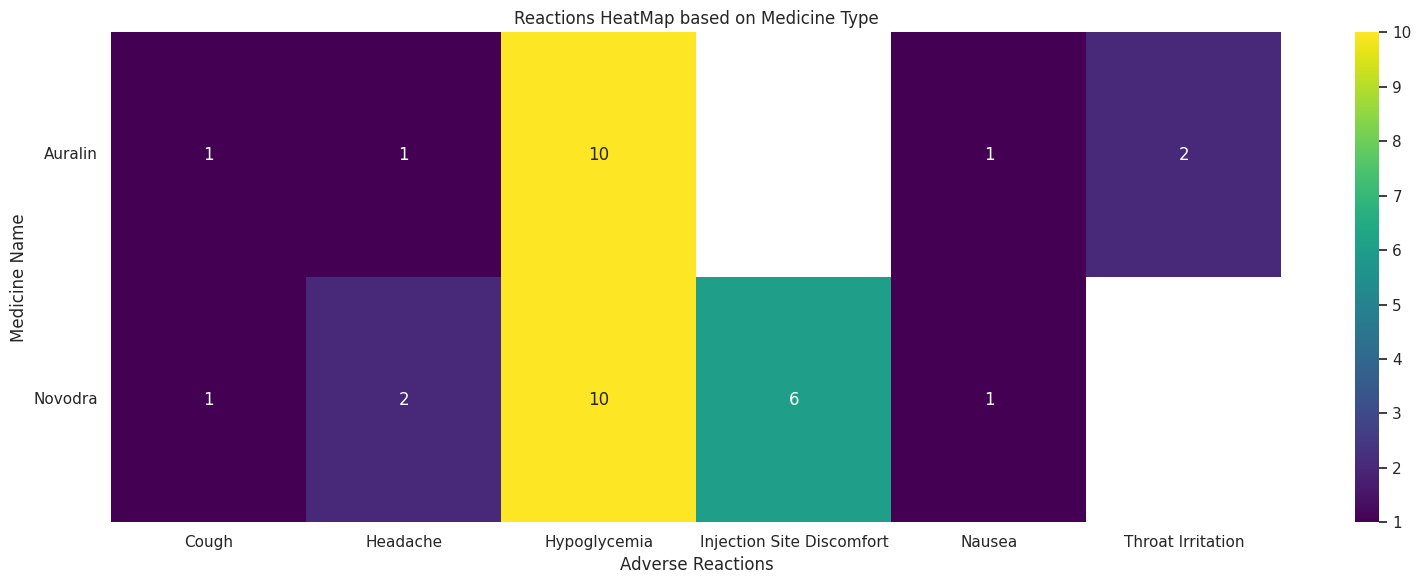

In [ ]:
# Reactions Vs Medicine Types

plt.figure(figsize=(16,6))

df_2dhist = pd.DataFrame({x_label: grp['medicine_name'].value_counts()
    for x_label, grp in final_with_reactions.groupby('adverse_reaction')})
sns.heatmap(df_2dhist, annot=True, cmap='viridis')
plt.title("Reactions HeatMap based on Medicine Type")
plt.xlabel('Adverse Reactions')
plt.ylabel('Medicine Name')
plt.yticks(rotation=0)

plt.grid(False)
plt.tight_layout()
plt.show()

**Insights** :

1. Plot-1 -> Hba1c Change Vs Reactions
    
    * Hypoglycemia has highest mean Hba1c Change, it might significantly impact blood sugar control, also the error bars indicate the wide range of Hba1c Change amogst the patients.
    * This chart fails to show the Causation, further research needs to be done w.r.t age, bmi and medicine type.

  
2. Plot-2 -> Dosage Difference Vs Reactions : seems to be similar to that of patients without reactions.


  
3. Plot-3 -> Medicine Type Vs Reactions
    (note : Blank Space in Plot => '0')
    * Both the medicines seems to have equal number of patients with Hypoglycemia as an adverse reaction, further study needs to be done based oon age, gender and bmi.
    * Novodra has high number of patients with Injection site discomfort, where as Auralin dosen't have any, here Auralin has an advantage.
    * But in case of throat irritation, Novodra is better, as it doesn't have any patients suffering through this reaction.
    * From above points we can see that, main focus should be "Hypoglycemia" reaction for further study based on age, gender and bmi.





**Multivariate Analysis to get better understanding**

**Main focus  =>  "Medicine Type and Adverse Reactions"  =>  Part-1 :**
1. [ Medicine & Reactions ] Vs Age
2. [ Medicine & Reactions ] Vs BMI
3. [ Medicine & Reactions ] Vs Gender


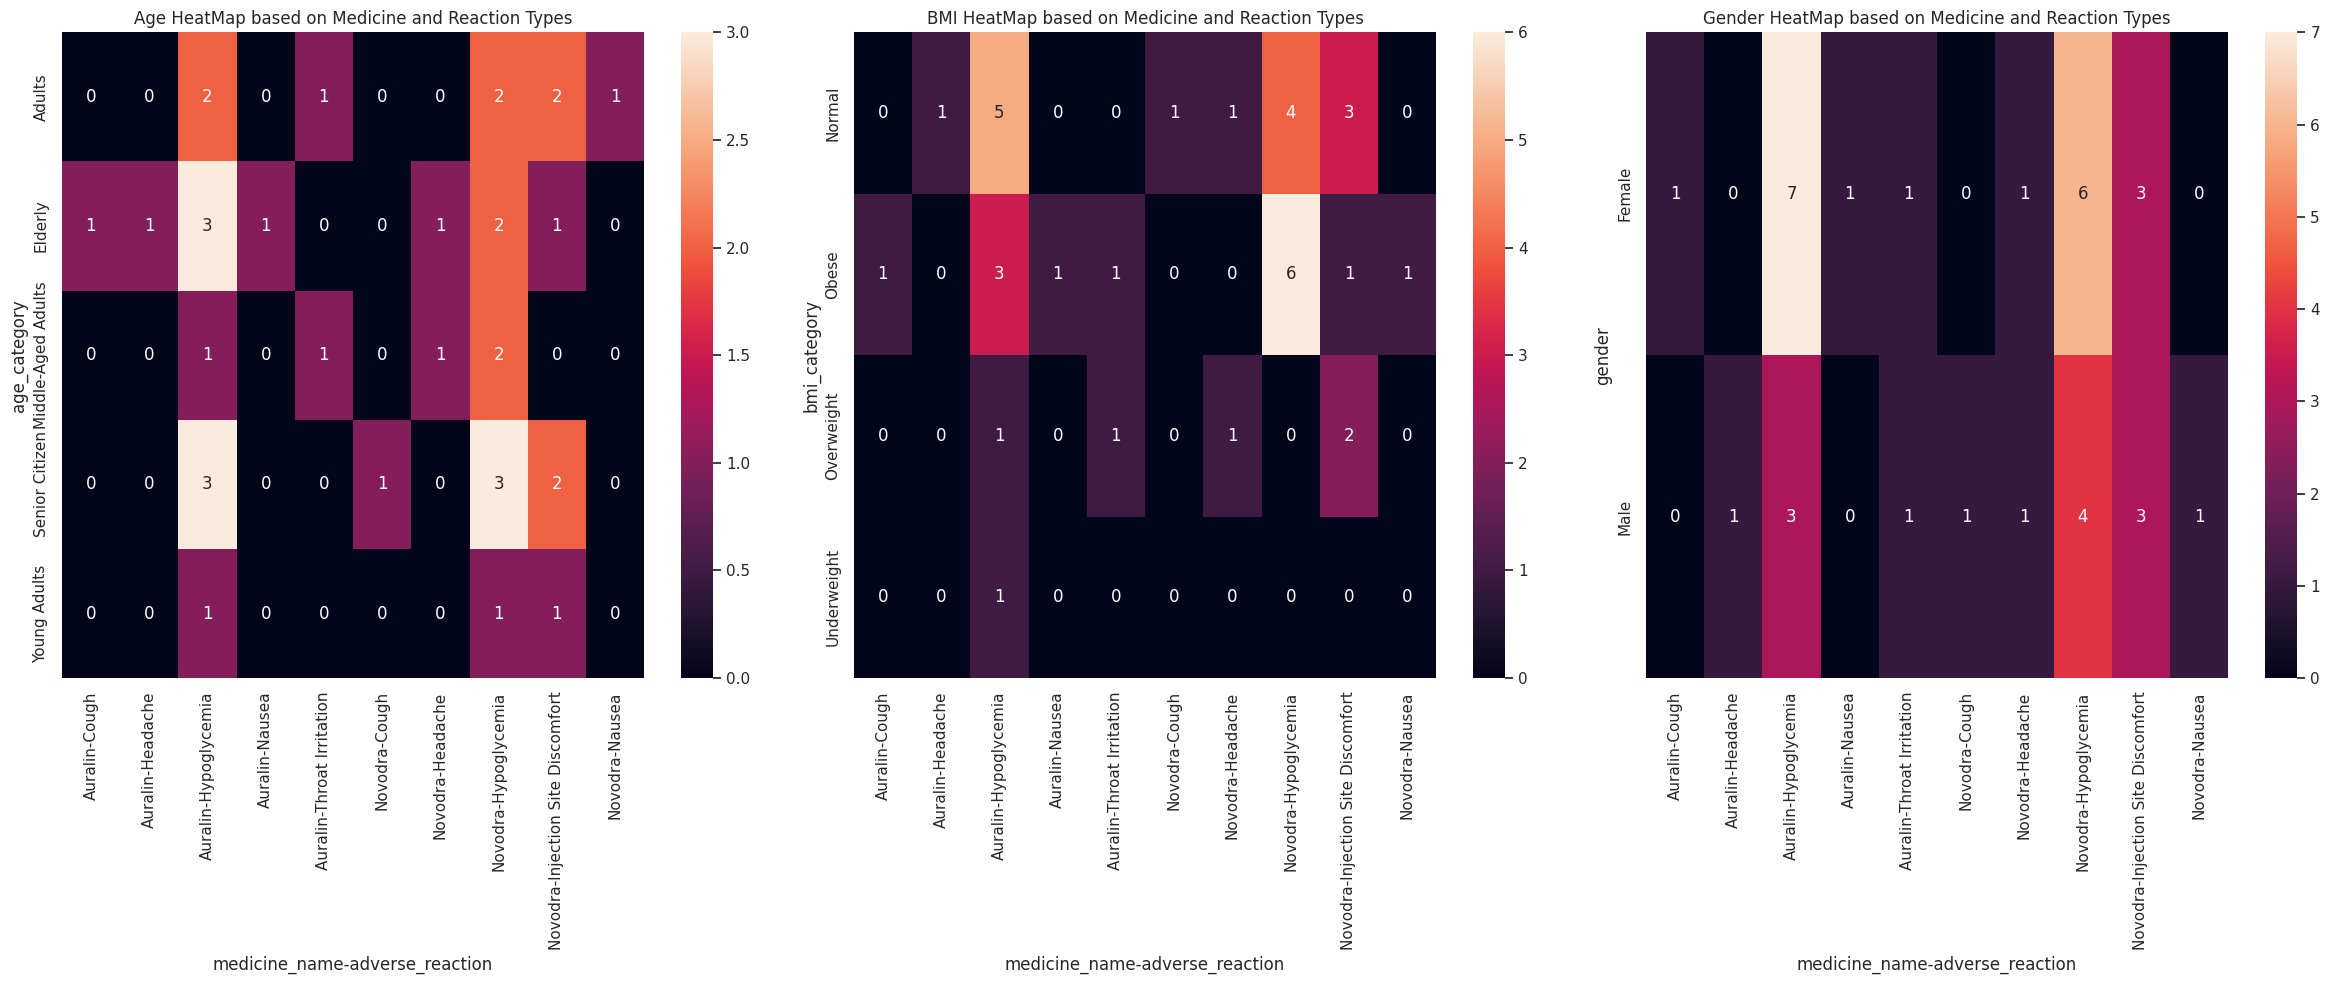

In [ ]:
# [Medicine & Reactions] vs Age, BMI and Gender : HEATMAPS
fig, axs = plt.subplots(1, 3, figsize=(24,10))

sns.set()
pivot = pd.crosstab(final_with_reactions["age_category"], [final_with_reactions["medicine_name"], final_with_reactions["adverse_reaction"]])
sns.heatmap(pivot, annot=True, fmt="d", ax=axs[0])
axs[0].set_title("Age HeatMap based on Medicine and Reaction Types")

sns.set()
pivot = pd.crosstab(final_with_reactions["bmi_category"], [final_with_reactions["medicine_name"], final_with_reactions["adverse_reaction"]])
sns.heatmap(pivot, annot=True, fmt="d", ax=axs[1])
axs[1].set_title("BMI HeatMap based on Medicine and Reaction Types")

sns.set()
pivot = pd.crosstab(final_with_reactions["gender"], [final_with_reactions["medicine_name"], final_with_reactions["adverse_reaction"]])
sns.heatmap(pivot, annot=True, fmt="d", ax=axs[2])
axs[2].set_title("Gender HeatMap based on Medicine and Reaction Types")

plt.tight_layout()
plt.show()

**Insights** :

1. Plot-1 -> Age Distributions w.r.t Medicine and Reaction Types :

  * Elderly patients experience higher number of reactions, middle aged adults have relatively low incidence of reactions.
  * In Auralin, elderly patients has highest number of hypoglycemia an cough reactions.
  * In Novodra elderly and adults experience similar levels of reaction, middle aged have lowest number of reactions.
  
2. Plot-2 -> BMI Distributions w.r.t Medicine and Reaction Types :

  * Auralin seems to have higher frequency of reactions across all bmi categories, particularly hyploglycemia and cough.
  * Novodra seems to have similar levels of reactions, except it's higher in Normal and obese people in case oh Hypoglycemia.

3. Plot-3 -> Gender Distributions w.r.t Medicine and reaction Types :

  * Auralin seems to have higher frequency of reactions in Females compared to males.
  * Novodra seems to have similar levles of reactions for both the genders.
  * Hypoglycemia in Female for auralin is higher that novodra, in case of male patients its equal.

  
4. Further Test need to be performed for better understanding.








**Main focus  =>  "Medicine Type and Adverse Reactions"  =>  Part-2 :**
4. [ Medicine & Reactions ] Vs Hba1c Change
5. [ Medicine & Reactions ] Vs Dosage Diff

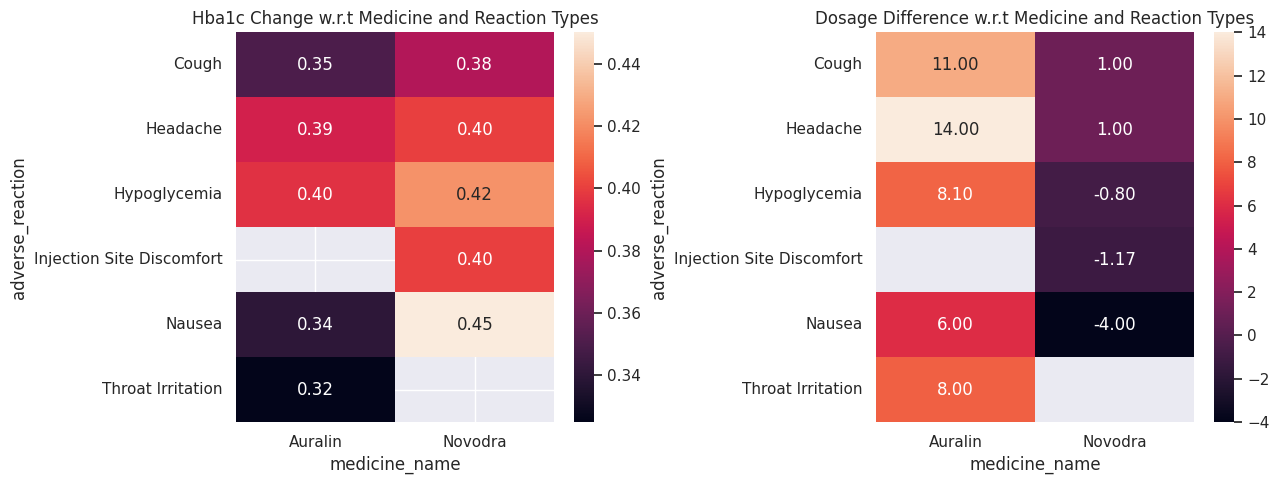

In [ ]:
# Medicine & Reactions Vs Hba1c Change and Dosage Difference
fig, axs = plt.subplots(1, 2, figsize=(13,5))

sns.set()
pivot = final_with_reactions.pivot_table(index="adverse_reaction", columns="medicine_name", values='hba1c_change', aggfunc='mean') # Specify the values parameter with a numeric column like 'dosage' and explicitly set the aggfunc to 'mean'
sns.heatmap(pivot, annot=True, fmt=".2f", ax=axs[0])
axs[0].set_title("Hba1c Change w.r.t Medicine and Reaction Types")
plt.grid(False)

sns.set()
pivot = final_with_reactions.pivot_table(index="adverse_reaction", columns="medicine_name", values='dosage_diff', aggfunc='mean') # Specify the values parameter with a numeric column like 'dosage' and explicitly set the aggfunc to 'mean'
sns.heatmap(pivot, annot=True, fmt=".2f", ax=axs[1])
axs[1].set_title("Dosage Difference w.r.t Medicine and Reaction Types")
plt.grid(False)

plt.tight_layout()
plt.show()

**Insights** :
  * **Note(imp)** : 'Hba1c Change' detects/measures the average blood sugar level, where as 'Hypoglycemia' is caused when the Blood Sugar Levels :
      *  below(<) 70 mg/dl, for people with diabetes.
      *  below(<) 55 mg/dl, for people without diabetes.
      * 'Hba1c Change' and 'Hypoglycemia' are related(Inversely Proportional).

  1. The Main insight we can gather for the above 2 heatmap plots is that even though 'Auralin' Patients had their Dosage increased compared to 'Novodra', still the 'Hba1c Change' is similar, which suggests that 'Novodra' acts same or even better in some cases with less dosage.

  2. Our main focus will be 'Hypoglycemia' as an adverse reaction, where we can see that patients suffering through this reaction under 'Auralin' category having higher dosage still produce same 'Hba1c Change' as patients under 'Novodra'



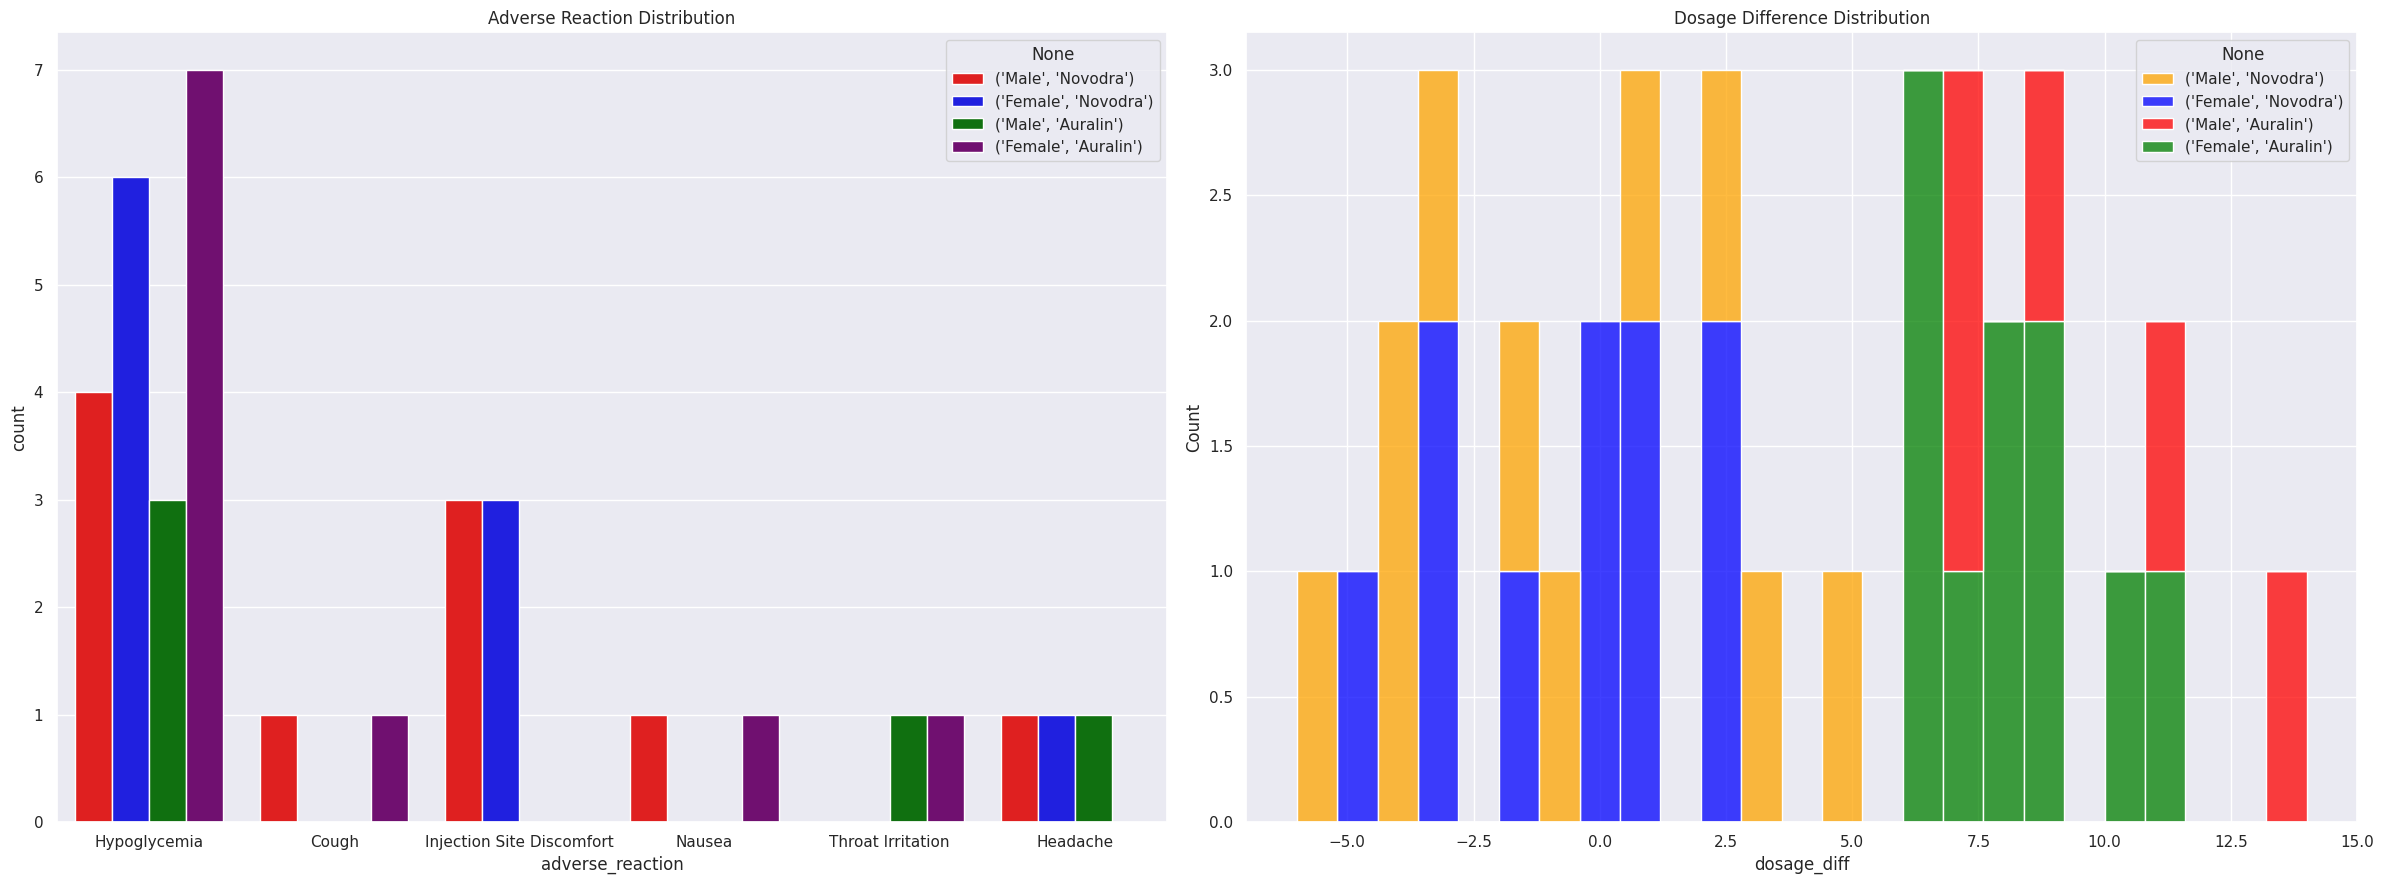

In [ ]:
#Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 9))

#Plot for adverse reaction distribution
sns.countplot(x='adverse_reaction',data=final_reactions,hue = final_reactions[['gender','medicine_name']].apply(tuple, axis=1), palette=['red','blue','green','purple'],ax=axes[0])
axes[0].set_title('Adverse Reaction Distribution')

#stacked bar Plot for dosage difference distribution
sns.histplot(data = final_reactions, x='dosage_diff', hue = final_reactions[['gender','medicine_name']].apply(tuple, axis=1), palette=['orange','blue','red','green'],multiple='stack',stat='count',binwidth=0.8)
axes[1].set_title('Dosage Difference Distribution')


plt.tight_layout()
plt.show()

**Insights** :

1.   Plot-1 -> Adverse Reaction distribution :

        * Hypoglycemia is the most common adverse reaction across all groups followed by cough.
        * others are relatively low frequency with injection site discomfort being the least common.
        *  'Aurilin' seems to be associated with more Hypoglycemia cases, while 'Novodra' might be linked to higher incidence of throat infection.
        * Females are more likely  to experience Hypoglycemia, Cough and throat irritation throught the trial period, where as other reactions are equally likely for either gender.
        * further Statistical tests are required for feature engineering.


2.   Plot-2 -> Dosage Difference Distribution :

        * Majority dosage difference are within range of -10 to 10 units, indicating most patients do not require high dosage adjustments.
        * There are few outliers, suggesting that some patients require modified adjustments.
        * For Aurilin, distributions for males appars slightly to right compared to females, suggesting males require slightly higher dosages.
        * for Novodra, Distributions for male and female seem similar.
        * Aurilin in general seem to be more spread out, indicating wider range of dosage difference compared to it's counterpart(Novodra).
        * Skewness in all groups appear to be slightly towards right indicating few individuals require larger dosages.
        * Further Statistical Tests are required.



### **Statistical Tests for "Patients With Adverse Reactions" :**

**1. Chi-squared test, To compare the effect of each Medicine and Reaction between Genders.**

In [ ]:
# Chi-squared test for [Medicine & Reaction] based on gender
from scipy.stats import chi2_contingency


# Null Hypothesis (H0) : "The distribution of Reaction Category is the same for both genders for each medicine."

# Alternative Hypothesis (H1) : "There is a significant difference in the distribution of Reaction Category between genders for each medicine."



# Create contingency table for Novodra
medicine1_table = pd.crosstab(final_with_reactions[final_with_reactions['medicine_name'] == 'Novodra']['gender'],
                              final_with_reactions[final_with_reactions['medicine_name'] == 'Novodra']['adverse_reaction'])

# Create contingency table for Auralin
medicine2_table = pd.crosstab(final_with_reactions[final_with_reactions['medicine_name'] == 'Auralin']['gender'],
                              final_with_reactions[final_with_reactions['medicine_name'] == 'Auralin']['adverse_reaction'])

# Perform Chi-squared test for Novodra :
chi2_stat_N, p_val_N, dof_N, expected_N = chi2_contingency(medicine1_table)

print("Statistical Values for Novodra Vs Gender:")
print(f"Chi-squared Statistics: {chi2_stat_N}")
print(f"P-Value: {p_val_N}")
if(p_val_N < 0.05):
    print("Reject 'H0', significant difference in Reaction Category between genders.")
else:
    print("Fail to reject 'H0', no significant difference in Reaction Category between genders.")


# Perform Chi-squared test for Novodra :
chi2_stat_A, p_val_A, dof_A, expected_A = chi2_contingency(medicine2_table)
print("\n")

print("Statistical Values for Auralin Vs Gender:")
print(f"Chi-squared Statistics: {chi2_stat_A}")
print(f"P-Value: {p_val_A}")
if(p_val_A < 0.05):
    print("Reject 'H0', significant difference in Reaction Category between genders.")
else:
    print("Fail to reject 'H0', no significant difference in Reaction Category between genders.")


print()
print('=======================================================================================================================================')

# Post-Hoc Tests

# Function to perform pairwise Chi-squared test
def pairwise_chi_squared_test(table):
    categories = table.index.unique()
    for i in range(len(categories)):
        for j in range(i+1, len(categories)):
            cat1 = categories[i]
            cat2 = categories[j]
            contingency_table = pd.crosstab(table.loc[cat1], table.loc[cat2])
            chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
            print(f"Pairwise Comparison: {cat1} vs {cat2}")
            print(f"Chi-squared Statistics: {chi2_stat}, P-Value: {p_val}")
            if(p_val < 0.05):
                print("Reject 'H0', significant difference between categories.")
            else:
                print("Fail to reject 'H0', no significant difference between categories.")
            print()
    print('=======================================================================================================================================')


# Perform pairwise Chi-squared test for Novodra
print("Pairwise Chi-squared Test for Novodra:")
pairwise_chi_squared_test(medicine1_table)


# Perform pairwise Chi-squared test for Auralin
print("\nPairwise Chi-squared Test for Auralin:")
pairwise_chi_squared_test(medicine2_table)

Statistical Values for Novodra Vs Gender:
Chi-squared Statistics: 2.4
P-Value: 0.6626272662068446
Fail to reject 'H0', no significant difference in Reaction Category between genders.


Statistical Values for Auralin Vs Gender:
Chi-squared Statistics: 3.3000000000000003
P-Value: 0.5089322578449986
Fail to reject 'H0', no significant difference in Reaction Category between genders.

Pairwise Chi-squared Test for Novodra:
Pairwise Comparison: Female vs Male
Chi-squared Statistics: 10.000000000000002, P-Value: 0.12465201948308108
Fail to reject 'H0', no significant difference between categories.


Pairwise Chi-squared Test for Auralin:
Pairwise Comparison: Female vs Male
Chi-squared Statistics: 6.666666666666668, P-Value: 0.15458730450476033
Fail to reject 'H0', no significant difference between categories.



**2. Chi-squared test, To compare the effect of each Medicine and Reaction across Age Categories.**

In [ ]:
# Chi-squared test for [Medicine & Reaction] based on Age Categories
from scipy.stats import chi2_contingency


# Null Hypothesis (H0) : "The distribution of Reaction Category is the same for all Aged patients for each medicine."

# Alternative Hypothesis (H1) : "There is a significant difference in the distribution of Reaction Category for all Aged patients for each medicine."




# Create contingency table for Novodra
medicine1_table = pd.crosstab(final_with_reactions[final_with_reactions['medicine_name'] == 'Novodra']['age_category'],
                              final_with_reactions[final_with_reactions['medicine_name'] == 'Novodra']['adverse_reaction'])

# Create contingency table for Auralin
medicine2_table = pd.crosstab(final_with_reactions[final_with_reactions['medicine_name'] == 'Auralin']['age_category'],
                              final_with_reactions[final_with_reactions['medicine_name'] == 'Auralin']['adverse_reaction'])

# Perform Chi-squared test for Novodra :
chi2_stat_N, p_val_N, dof_N, expected_N = chi2_contingency(medicine1_table)

print("Statistical Values for Novodra Vs Age :")
print(f"Chi-squared Statistics: {chi2_stat_N}")
print(f"P-Value: {p_val_N}")
if(p_val_N < 0.05):
    print("Reject 'H0', significant difference in Reaction Category across all Age Categories.")
else:
    print("Fail to reject 'H0', no significant difference in Reaction Category across all Age Categories.")


# Perform Chi-squared test for Novodra :
chi2_stat_A, p_val_A, dof_A, expected_A = chi2_contingency(medicine2_table)
print("\n")

print("Statistical Values for Auralin Vs Age :")
print(f"Chi-squared Statistics: {chi2_stat_A}")
print(f"P-Value: {p_val_A}")
if(p_val_A < 0.05):
    print("Reject 'H0', significant difference in Reaction Category across all Age Categories.")
else:
    print("Fail to reject 'H0', no significant difference in Reaction Category across all Age Categories.")


print()
print('=======================================================================================================================================')

# Post-Hoc Tests

# Function to perform pairwise Chi-squared test
def pairwise_chi_squared_test(table):
    categories = table.index.unique()
    for i in range(len(categories)):
        for j in range(i+1, len(categories)):
            cat1 = categories[i]
            cat2 = categories[j]
            contingency_table = pd.crosstab(table.loc[cat1], table.loc[cat2])
            chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
            print(f"Pairwise Comparison: {cat1} vs {cat2}")
            print(f"Chi-squared Statistics: {chi2_stat}, P-Value: {p_val}")
            if(p_val < 0.05):
                print("Reject 'H0', significant difference across all Age Categories.")
            else:
                print("Fail to reject 'H0', no significant difference across all Age Categories.")
            print()
    print('=======================================================================================================================================')


# Perform pairwise Chi-squared test for Novodra
print("Pairwise Chi-squared Test for Novodra:")
pairwise_chi_squared_test(medicine1_table)


# Perform pairwise Chi-squared test for Auralin
print("\nPairwise Chi-squared Test for Auralin:")
pairwise_chi_squared_test(medicine2_table)

Statistical Values for Novodra Vs Age :
Chi-squared Statistics: 10.822222222222221
P-Value: 0.8203233032920543
Fail to reject 'H0', no significant difference in Reaction Category across all Age Categories.


Statistical Values for Auralin Vs Age :
Chi-squared Statistics: 9.75
P-Value: 0.8793536364333818
Fail to reject 'H0', no significant difference in Reaction Category across all Age Categories.

Pairwise Chi-squared Test for Novodra:
Pairwise Comparison: Adults vs Elderly
Chi-squared Statistics: 3.75, P-Value: 0.44089552967916945
Fail to reject 'H0', no significant difference across all Age Categories.

Pairwise Comparison: Adults vs Middle-Aged Adults
Chi-squared Statistics: 3.3333333333333335, P-Value: 0.5036682742334984
Fail to reject 'H0', no significant difference across all Age Categories.

Pairwise Comparison: Adults vs Senior Citizen
Chi-squared Statistics: 6.25, P-Value: 0.39577565990459973
Fail to reject 'H0', no significant difference across all Age Categories.

Pairwise C

**3. Chi-squared test, To compare the effect of each Medicine and Reaction across BMI Categories.**

In [ ]:
# Chi-squared test for [Medicine & Reaction] based on BMI Categories
from scipy.stats import chi2_contingency


# Null Hypothesis (H0) : "The distribution of Reaction Category is the same for all Aged patients for each medicine."

# Alternative Hypothesis (H1) : "There is a significant difference in the distribution of Reaction Category for all Aged patients for each medicine."



# Create contingency table for Novodra
medicine1_table = pd.crosstab(final_with_reactions[final_with_reactions['medicine_name'] == 'Novodra']['bmi_category'],
                              final_with_reactions[final_with_reactions['medicine_name'] == 'Novodra']['adverse_reaction'])

# Create contingency table for Auralin
medicine2_table = pd.crosstab(final_with_reactions[final_with_reactions['medicine_name'] == 'Auralin']['bmi_category'],
                              final_with_reactions[final_with_reactions['medicine_name'] == 'Auralin']['adverse_reaction'])

# Perform Chi-squared test for Novodra :
chi2_stat_N, p_val_N, dof_N, expected_N = chi2_contingency(medicine1_table)

print("Statistical Values for Novodra Vs BMI :")
print(f"Chi-squared Statistics: {chi2_stat_N}")
print(f"P-Value: {p_val_N}")
if(p_val_N < 0.05):
    print("Reject 'H0', significant difference in Reaction Category across all BMI Categories.")
else:
    print("Fail to reject 'H0', no significant difference in Reaction Category across all BMI Categories.")




# Perform Chi-squared test for Novodra :
chi2_stat_A, p_val_A, dof_A, expected_A = chi2_contingency(medicine2_table)
print("\n")

print("Statistical Values for Auralin Vs BMI :")
print(f"Chi-squared Statistics: {chi2_stat_A}")
print(f"P-Value: {p_val_A}")
if(p_val_A < 0.05):
    print("Reject 'H0', significant difference in Reaction Category across all BMI Categories.")
else:
    print("Fail to reject 'H0', no significant difference in Reaction Category across all BMI Categories.")


print()
print('=======================================================================================================================================')
print()

# Post-Hoc Tests

# Function to perform pairwise Chi-squared test
def pairwise_chi_squared_test(table):
    categories = table.index.unique()
    for i in range(len(categories)):
        for j in range(i+1, len(categories)):
            cat1 = categories[i]
            cat2 = categories[j]
            contingency_table = pd.crosstab(table.loc[cat1], table.loc[cat2])
            chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
            print(f"Pairwise Comparison: {cat1} vs {cat2}")
            print(f"Chi-squared Statistics: {chi2_stat}, P-Value: {p_val}")
            if(p_val < 0.05):
                print("Reject 'H0', significant difference across all BMI Categories.")
            else:
                print("Fail to reject 'H0', no significant difference across all BMI Categoriess.")
            print()
    print('=======================================================================================================================================')


# Perform pairwise Chi-squared test for Novodra
print("Pairwise Chi-squared Test for Novodra:")
pairwise_chi_squared_test(medicine1_table)


# Perform pairwise Chi-squared test for Auralin
print("\nPairwise Chi-squared Test for Auralin:")
pairwise_chi_squared_test(medicine2_table)

Statistical Values for Novodra Vs BMI :
Chi-squared Statistics: 9.916666666666668
P-Value: 0.2709236339758113
Fail to reject 'H0', no significant difference in Reaction Category across all BMI Categories.


Statistical Values for Auralin Vs BMI :
Chi-squared Statistics: 8.25
P-Value: 0.7653012548551137
Fail to reject 'H0', no significant difference in Reaction Category across all BMI Categories.


Pairwise Chi-squared Test for Novodra:
Pairwise Comparison: Normal vs Obese
Chi-squared Statistics: 10.000000000000002, P-Value: 0.12465201948308108
Fail to reject 'H0', no significant difference across all BMI Categoriess.

Pairwise Comparison: Normal vs Overweight
Chi-squared Statistics: 6.666666666666668, P-Value: 0.35277615643394034
Fail to reject 'H0', no significant difference across all BMI Categoriess.

Pairwise Comparison: Obese vs Overweight
Chi-squared Statistics: 3.333333333333334, P-Value: 0.5036682742334984
Fail to reject 'H0', no significant difference across all BMI Categories

**4. Chi-squared test, To compare the effect of each Medicine and Reaction across Hba1c Change Levels.**

In [ ]:
# Chi-squared test for [Medicine & Reaction] based on Hba1c Change Levels
from scipy.stats import chi2_contingency


# Null Hypothesis (H0) : "The distribution of Reaction Category is the same for all Hba1c Change, for each medicine."

# Alternative Hypothesis (H1) : "There is a significant difference in the distribution of Reaction Category for all Hba1c Change, for each medicine."



# Create contingency table for Novodra
medicine1_table = pd.crosstab(final_with_reactions[final_with_reactions['medicine_name'] == 'Novodra']['hba1c_change'],
                              final_with_reactions[final_with_reactions['medicine_name'] == 'Novodra']['adverse_reaction'])

# Create contingency table for Auralin
medicine2_table = pd.crosstab(final_with_reactions[final_with_reactions['medicine_name'] == 'Auralin']['hba1c_change'],
                              final_with_reactions[final_with_reactions['medicine_name'] == 'Auralin']['adverse_reaction'])

# Perform Chi-squared test for Novodra :
chi2_stat_N, p_val_N, dof_N, expected_N = chi2_contingency(medicine1_table)

print("Statistical Values for Novodra Vs Hba1c:")
print(f"Chi-squared Statistics: {chi2_stat_N}")
print(f"P-Value: {p_val_N}")
if(p_val_N < 0.05):
    print("Reject 'H0', significant difference in Reaction Category across all Hba1c Change levels.")
else:
    print("Fail to reject 'H0', no significant difference in Reaction Category across all Hba1c Change levels.")

print()
print('=======================================================================================================================================')
# Perform Chi-squared test for Novodra :
chi2_stat_A, p_val_A, dof_A, expected_A = chi2_contingency(medicine2_table)
print()

print("Statistical Values for Auralin Vs Hba1c :")
print(f"Chi-squared Statistics: {chi2_stat_A}")
print(f"P-Value: {p_val_A}")
if(p_val_A < 0.05):
    print("Reject 'H0', significant difference in Reaction Category across all Hba1c Change levels.")
else:
    print("Fail to reject 'H0', no significant difference in Reaction Category across all Hba1c Change levels.")

Statistical Values for Novodra Vs Hba1c:
Chi-squared Statistics: 45.444444444444436
P-Value: 0.4116602007622866
Fail to reject 'H0', no significant difference in Reaction Category across all Hba1c Change levels.


Statistical Values for Auralin Vs Hba1c :
Chi-squared Statistics: 40.75
P-Value: 0.4372905864936219
Fail to reject 'H0', no significant difference in Reaction Category across all Hba1c Change levels.


#### **Some test for Adverse Reaction == "Hypoglycemia" :**

**5. T-test, To compare the effect of each Medicine across all Hba1c Change Levels in 'Hypoglycemic' Patients.**

In [ ]:
# 2-sample t-test for [Medicine & Reaction=='Hypoglycemia'] based on Hba1c Change Levels
from scipy.stats import ttest_ind

# Null Hypothesis (H0) : "The distribution of Medicine Type is the same for all Hba1c Difference, for each medicine amongst 'Hypoglycemic' patients."

# Alternative Hypothesis (H1) : "There is a significant difference in the distribution of Medicine Type for all Hba1c Difference, for each medicine amongst 'Hypoglycemic' patients."

# Create tables for Novodra and Auralin with Hypoglycemic patients, to check disparity between Hba1c Change
medicine1_table = final_with_reactions[(final_with_reactions['medicine_name'] == 'Novodra') & (final_with_reactions['adverse_reaction'] == 'Hypoglycemia')]['hba1c_change']

medicine2_table = final_with_reactions[(final_with_reactions['medicine_name'] == 'Auralin') & (final_with_reactions['adverse_reaction'] == 'Hypoglycemia')]['hba1c_change']

# Two-sample t-test
def t_test(medicine1_table, medicine2_table):
    t_stat, p_val = ttest_ind(medicine1_table, medicine2_table, equal_var=True)
    return t_stat, p_val

t_stat, t_p_val = t_test(medicine1_table, medicine2_table)
print(f"T-statistic = {t_stat}, P-value = {t_p_val}")

print()

if(t_p_val < 0.05):
    print("Reject 'H0', significant difference in Medicine across all Hba1c Change levels for 'Hypoglycemic Patients'.")
else:
    print("Fail to reject 'H0', no significant difference in Medicine across all Hba1c Change levels for 'Hypoglycemic Patients'.")

T-statistic = 0.8982742074245204, P-value = 0.38089831587219947

Fail to reject 'H0', no significant difference in Medicine across all Hba1c Change levels for 'Hypoglycemic Patients'.


**6. T-test, To compare the effect of each Medicine across all Age Levels in 'Hypoglycemic' Patients.**

In [ ]:
# 2-sample t-test for [Medicine & Reaction=='Hypoglycemia'] based on all Age levels
from scipy.stats import ttest_ind

# Null Hypothesis (H0) : "The distribution of Medicine Type is the same for all Age levels, for each medicine amongst 'Hypoglycemic' patients."

# Alternative Hypothesis (H1) : "There is a significant difference in the distribution of Medicine Type for all age levels, for each medicine amongst 'Hypoglycemic' patients."

# Create tables for Novodra and Auralin with Hypoglycemic patients, to check disparity amongst Ages
medicine1_table = final_with_reactions[(final_with_reactions['medicine_name'] == 'Novodra') & (final_with_reactions['adverse_reaction'] == 'Hypoglycemia')]['age']

medicine2_table = final_with_reactions[(final_with_reactions['medicine_name'] == 'Auralin') & (final_with_reactions['adverse_reaction'] == 'Hypoglycemia')]['age']

# Two-sample t-test
def t_test(medicine1_table, medicine2_table):
    t_stat, p_val = ttest_ind(medicine1_table, medicine2_table, equal_var=True)
    return t_stat, p_val

t_stat, t_p_val = t_test(medicine1_table, medicine2_table)
print(f"T-statistic = {t_stat}, P-value = {t_p_val}")

print()

if(t_p_val < 0.05):
    print("Reject 'H0', significant difference in Medicine across all Age levels for 'Hypoglycemic Patients'.")
else:
    print("Fail to reject 'H0', no significant difference in Medicine across all Age levels for 'Hypoglycemic Patients'.")

T-statistic = -0.15237404215024444, P-value = 0.880586913446325

Fail to reject 'H0', no significant difference in Medicine across all Age levels for 'Hypoglycemic Patients'.


**7. T-test, To compare the effect of each Medicine across all BMI Levels in 'Hypoglycemic' Patients.**

In [ ]:
# 2-sample t-test for [Medicine & Reaction=='Hypoglycemia'] based on all BMI levels
from scipy.stats import ttest_ind

# Null Hypothesis (H0) : "The distribution of Medicine Type is the same for all BMI indices, for each medicine amongst 'Hypoglycemic' patients."

# Alternative Hypothesis (H1) : "There is a significant difference in the distribution of Medicine Type for all BMI indices, for each medicine amongst 'Hypoglycemic' patients."

# Create tables for Novodra and Auralin with Hypoglycemic patients, to check disparity amongst BMI indices
medicine1_table = final_with_reactions[(final_with_reactions['medicine_name'] == 'Novodra') & (final_with_reactions['adverse_reaction'] == 'Hypoglycemia')]['age']

medicine2_table = final_with_reactions[(final_with_reactions['medicine_name'] == 'Auralin') & (final_with_reactions['adverse_reaction'] == 'Hypoglycemia')]['age']

# Two-sample t-test
def t_test(medicine1_table, medicine2_table):
    t_stat, p_val = ttest_ind(medicine1_table, medicine2_table, equal_var=True)
    return t_stat, p_val

t_stat, t_p_val = t_test(medicine1_table, medicine2_table)
print(f"T-statistic = {t_stat}, P-value = {t_p_val}")

print()

if(t_p_val < 0.05):
    print("Reject 'H0', significant difference in Medicine across all BMI indices for 'Hypoglycemic Patients'.")
else:
    print("Fail to reject 'H0', no significant difference in Medicine across all BMI indices for 'Hypoglycemic Patients'.")

T-statistic = -0.15237404215024444, P-value = 0.880586913446325

Fail to reject 'H0', no significant difference in Medicine across all BMI indices for 'Hypoglycemic Patients'.


**8. T-test, To compare the effect of each Medicine across all Dosage Difference Levels in 'Hypoglycemic' Patients.**

In [ ]:
# 2-sample t-test for [Medicine & Reaction=='Hypoglycemia'] based on all Dosage Difference levels
from scipy.stats import ttest_ind

# Null Hypothesis (H0) : "The distribution of Medicine Type is the same for all Dosage Difference, for each medicine amongst 'Hypoglycemic' patients."

# Alternative Hypothesis (H1) : "There is a significant difference in the distribution of Medicine Type for all Dosage Difference, for each medicine amongst 'Hypoglycemic' patients."

# Create tables for Novodra and Auralin with Hypoglycemic patients, to check disparity amongst Dosage Difference
medicine1_table = final_with_reactions[(final_with_reactions['medicine_name'] == 'Novodra') & (final_with_reactions['adverse_reaction'] == 'Hypoglycemia')]['dosage_diff']

medicine2_table = final_with_reactions[(final_with_reactions['medicine_name'] == 'Auralin') & (final_with_reactions['adverse_reaction'] == 'Hypoglycemia')]['dosage_diff']

# Two-sample t-test
def t_test(medicine1_table, medicine2_table):
    t_stat, p_val = ttest_ind(medicine1_table, medicine2_table, equal_var=True)
    return t_stat, p_val

t_stat, t_p_val = t_test(medicine1_table, medicine2_table)
print(f"T-statistic = {t_stat}, P-value = {t_p_val}")

print()

if(t_p_val < 0.05):
    print("Reject 'H0', significant difference in Medicine across all Dosage Difference levels for 'Hypoglycemic Patients'.")
else:
    print("Fail to reject 'H0', no significant difference in Medicine across all Dosage Difference levels for 'Hypoglycemic Patients'.")

T-statistic = -7.567049686889562, P-value = 5.362807994572336e-07

Reject 'H0', significant difference in Medicine across all Dosage Difference levels for 'Hypoglycemic Patients'.


### **Summary of all the statistical test performed on patients with Adverse Reaction :**

  1. Chi-square test([ Medicine & Reaction ] Vs Gender) : We can see that, we fail to reject the Null Hypothesis, which indicates there is no such significant difference between genders.
    * p-value for Novodra = 0.662
    * p-value for Auralin = 0.508
    * p-values for pair-wise stat tests also give same outputs.

  
  2. Chi-square test([ Medicine & Reaction ] Vs Age Category) : We can see that, we fail to reject the Null Hypothesis, which indicates there is no such significant difference across all age groups.
    * p-value for Novodra = 0.751
    * p-value for Auralin = 0.873
    * p-values for pair-wise stat tests also give same outputs.
  
  
  3. Chi-square test([ Medicine & Reaction ] Vs BMI Category) : We can see that, we fail to reject the Null Hypothesis, which indicates there is no such significant difference across all BMI groups.
    * p-value for Novodra = 0.270
    * p-value for Auralin = 0.765
    * p-values for pair-wise stat tests also give same outputs.

  
  4. Chi-square test([ Medicine & Reaction ] Vs Hba1c Change) : We can see that, we fail to reject the Null Hypothesis, which indicates there is no such significant difference across all Hba1c Change levels.
    * p-value for Novodra = 0.411
    * p-value for Auralin = 0.437
    * p-values for pair-wise stat tests also give same outputs.

  
  5. T-test(Medicine Vs Hba1c Change) for 'Hypoglycemic' Patients : We can see that, we fail to reject the Null Hypothesis, which indicates there is no such significant difference across all Hba1c Change levels.
    * p-value = 0.380

  
  6. T-test(Medicine Vs Age) for 'Hypoglycemic' Patients : We can see that, we fail to reject the Null Hypothesis, which indicates there is no such significant difference across all Age Groups.
    * p-value = 0.880

  
  7. T-test(Medicine Vs BMI) for 'Hypoglycemic' Patients : We can see that, we fail to reject the Null Hypothesis, which indicates there is no such significant difference across all BMi groups.
    * p-value = 0.216


  8. T-test(Medicine Vs Dosage_difference) for 'Hypoglycemic' Patients : We Reject the Null Hypothesis, which indicates there is Significant difference in Dosage Difference between Medcine Types.
    * From above visuals, it's clear that 'Auralin' requires more dosage to maintain the similar results as of 'Novodra'
    * p-value = 5.362807994572336e-07

  


# **CONCLUSIONS**

### **Section-Wise Conclusions :**

*[ Note : Main conclusions are in section-5 ]*

### **Section-1 -> Aim and Problem Statement for EDA and Statistical Tests :**
  
  * Explained the main motive behind the whole EDA of the Clinical Trial Data as well as provided a Problem statement upon which we try to investigate further.


### **Section-2 -> Description of the Data and Table wise EDA and tests :**

  * Given brief description of Datasets which we are going to study and perform EDA and Statistical tests.
  * In Table-wise EDA we learned the following :

      * In Table-1 : "Patients" table, we studied various things like patterns and visual based on demographics of patients and required tests.
      * In Table-2 : "Treatments" table, we studied the 350 patients selected for the clinical trial, visuals and patterns based on their dosage and Hba1c levels.
      * In Table-3 : Reactions table, we studied the few patients that had suffered though some kind of adverse reaction during the trial.
      * In Table-4 : "Patients merged with Reactions" table : In this table we have done Univariate and Multivariate Analysis based on the Patients Demographics w.r.t their Adverse Reactions.
      * In Table-5 : "Patients merged with treatments" table : In this table we have done Univariate and Multivariate Analysis based on the Patients Demographics w.r.t their treatment factors such as Hba1c Change and Dosage.
      * These merging will help in creating one final Dataset for which we can deeply Analyze further.
  

### **Section-3 -> Merging Necessary Datasets :**

  * We have performed various modification to already existing datasets to create 2 final tables of the necessary patients that went through Clinical Trial Period.
      
      * "final_without reactions" Table : We created a final table with all the necessary information of the patients that had **No** adverse reaction symptom during trial period.
      * "final_with_reactions" Table : We created a finl table with all the necessary information of the patients that had adverse reaction symptoms during trial period.


### **Section-4 -> Data Extracted Until now :**
  * Shown the necessary final tables on which we are going to do iur main EDA and statistical tests.

### **Section-5 -> Main EDA and Statistical Analysis :**
1. **Table-1 -> "final_without_reactions" -> [ EDA+Stats ] :**
  * Here we have a final curated table for all the patients that had gone through the clinical trial and had **No** Adverse Reaction symptoms.
  * We have various analysis based on Medicine types and the patient demographics and we have found out that :
      1. "Auralin" distribution in Females are higher compared to Males.
      2. BMI spread across patients with "Auralin" is uniform, unlike "Novodra" patients.
      3. There is some distribution disparity amongst the adults and teenage - age categories for medicine distribution.
      4. Dosage difference is less in "Novodra", unlike "Auralin" where it is opposite, which suggests auralin patients have to take more dosage to produce similar kinds of results as that of Novodra.
      5. Hba1c Change seems to vary between the two medicine types.

  * **Statistical tests for Table-1 :**



   * Based on above visuals we have performed necessary tests, here are the following conclusions :
        1. There is No significant difference in Hba1c change levels between genders.
        2. There is No significant difference for medicine types across all age categories.
        3. There is difference acros  all bmi categories for "Novodra" patients unlike "Auralin" patients.
        4. There is also difference in dosage difference for Medicine types between the genders.


2. **Table-2 -> "final_with_reactions" -> [ EDA+Stats ] :**
    * Here we have a final curated table for all the patients that had gone through the clinical trial and had Adverse Reaction symptoms.
    * "Hypoglycemia" is also the only adverse reaction/symptom that can cause because of low bllod sugar level(bllod glucose level <= 70 mg/dl).
    * The above points suggest that "Hypoglycemia" and Hba1c change are related i.e., ["Hypoglycemia" <= Inversely Proportional => Hba1c Change].
    * We have various analysis based on Medicine and Reaction types and the patient demographics and we have found out that :
        1. "Hypoglycemia" is much higher in frequency for Females compared to Males.
        2. "Hypoglycemia" seems to have high impact on Obese and healthy people as compared to others.
        3. "Hypoglycemia" seems to be amajor concern for patients above 55 years of age.
        4. Elderly patients experience higher number of reactions, middle aged adults have relatively low incidence of reactions.
        5. "Auralin" seems to have higher frequency of reactions across all bmi categories, particularly hyploglycemia and cough.
        6. * We can see that "Auralin" patients required much higher dosage during the trial period to produce similar levels of Hba1c Change levels as that of "Novodra" patients, here "Novodra" prevails "Auralin".

  * **Statistical tests :**


   * Based on above visuals we have performed necessary tests, here are the following conclusions:
        1. There is "No" such significant difference in Adverse Reactions between the 2 genders for the 2 Medicine types.
        2. There is "No" such significant difference in Adverse Reactions across all Age groups for the 2 Medicine types.
        3. There is "No" such significant difference in Adverse Reactions across all BMI groups for the 2 Medicine types.
        4. There is "No" such significant difference in Hba1c Change levels across all Adverse reactions for the 2 Medicine types.
          ---
        * Some tests for the "Hypoglycemic" Patients :
        5. There is "No" such significant difference in Hba1c Change levels for "Hypoglycemic" patients for the 2 Medicine types.
        6. There is "No" such significant difference in "Hypoglycemic" patient frequancy across all Age groups for the 2 Medicine types.
        7. There is "No" such significant difference in "Hypoglycemic" patient frequancy across all BMI groups for the 2 Medicine types.
        8. There is "Significant" Dosage Difference in "Hypoglycemic" patient frequancy for the 2 Medicine types, which indicates again that : 'Auralin' requires more dosage to maintain the similar results as of 'Novodra'.



# **RECOMMENDATIONS**


### **Final Report: *Clinical Trial Data Analysis***

**Executive Summary :**
- This report presents the findings of an exploratory data analysis (EDA) and statistical analysis of clinical trial data. The study aimed to investigate the effectiveness and safety of two medicines, Auralin and Novodra, in patients with diabetes. The analysis revealed significant insights into patient demographics, treatment outcomes, and adverse reactions.

- **Recommendations :**
  * **Affordability and Cost-Effectiveness**:

   * Auralin's requirement for higher dosage frequencies may render it less affordable and cost-effective in the market. A comprehensive cost-benefit analysis is essential to assess the economic implications of substituting Auralin with Novodra.
   * Enhanced Monitoring: Female patients should be closely monitored for signs of hypoglycemia to ensure timely intervention.
   * Personalized Dosage Adjustment: Dosage regimens for elderly patients should be carefully adjusted to mitigate potential adverse effects.
   * BMI-Informed Treatment Planning: Treatment plans should take into account patients' BMI categories to optimize efficacy and minimize risks.
   * Hypoglycemia Risk Mitigation: Additional studies should focus on developing and implementing effective safety measures to minimize hypoglycemia risk.
   
- **Conclusion :**
This analysis provides valuable insights into the clinical trial data, highlighting differences in treatment outcomes and adverse reactions between Auralin and Novodra. The recommendations aim to improve patient safety and treatment efficacy.
- **Note :** This report summarizes the key findings and recommendations. For detailed analysis and visualizations, refer to the original EDA and statistical analysis sections.